<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals + Milestone Project : BitPredict

Lets write code to predict the price of Bitcoin based on the historical price of Bitcoin

# Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-04 12:53:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-09-04 12:53:11 (7.47 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
# Read in our bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
parse_dates = ["Date"] ,  # parse_dates parametresi, belirli sütunların tarih ve saat olarak ayrılması gerektiğini belirtir. Bu durumda, "Date" sütunu tarih ve saat olarak ayrılacak.
index_col = ["Date"]     # index_col parametresi, veri çerçevesinin hangi sütununun endeks (indeks) olarak kullanılacağını belirtir. Bu durumda, "Date" sütunu endeks olarak kullanılacak, yani her satırın bir tarih ve saat indeksi olacak.
)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
8*365  # We have data into 8 years

2920

We have collected the historical price of bitcoin for the past 8 years but there is 2787 samples.

Typically deep learning models usually like lots and lots and lost of samples ( where lots and lots and lots can be thousand to tens of thousand to millions )

A smaller number of samples is something you will often run into with time series problems.

**Note**: The seasionality of a time series dataset is referred as the number of samples per year. So for our bitcoin data it has a seasionality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.


In [6]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame( df["Closing Price (USD)"] ).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


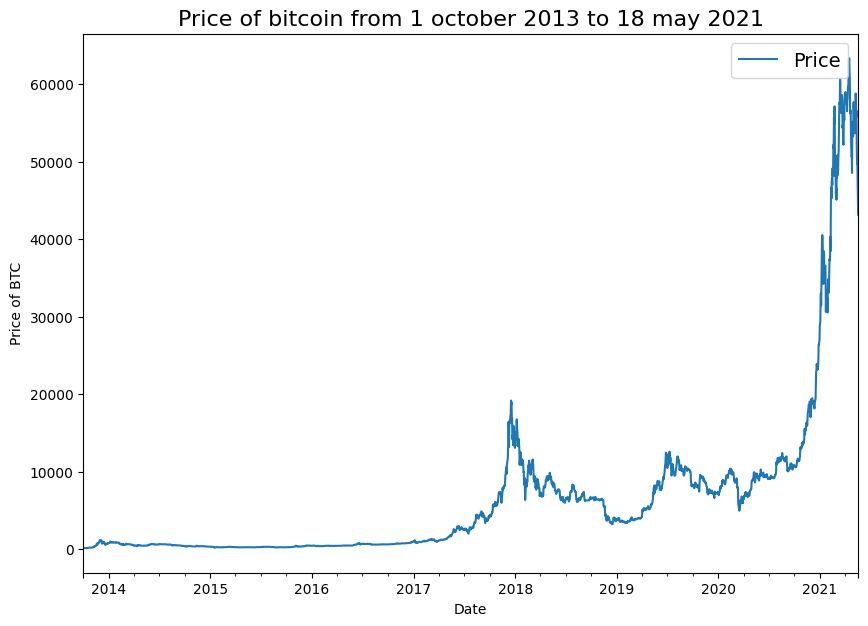

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = ( 10 , 7 ))
plt.ylabel("Price of BTC")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14);

# Read CSV files with Python

In [8]:
import csv
from datetime import datetime
timesteps = []  # For our date variables.
btc_price = []
# r means read and f means file
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = "," )  # Datamızı raw formatta açarsak variableların virgüllerle ayrıldığını görüyoruz bu yüzden delimiter ı virgüle eşitlememiz gerek
  next(csv_reader) # Skip first line(this gets rid of the column titles)(Yani Closing Price (USD)	24h Open (USD) gibi headerları pas geçiyor. )
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] , "%Y-%m-%d"))  # Burda aslında line[1] bizim date variablelarımız datamızdaki o date variablelarını alıyoruz. %Y : year , %m : month , %d : date. Get the dates as dates (not string)
    btc_price.append(float(line[2]))  # Get the closing price as float

# View the firs 10 of each
timesteps[ : 10] , btc_price[ : 10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

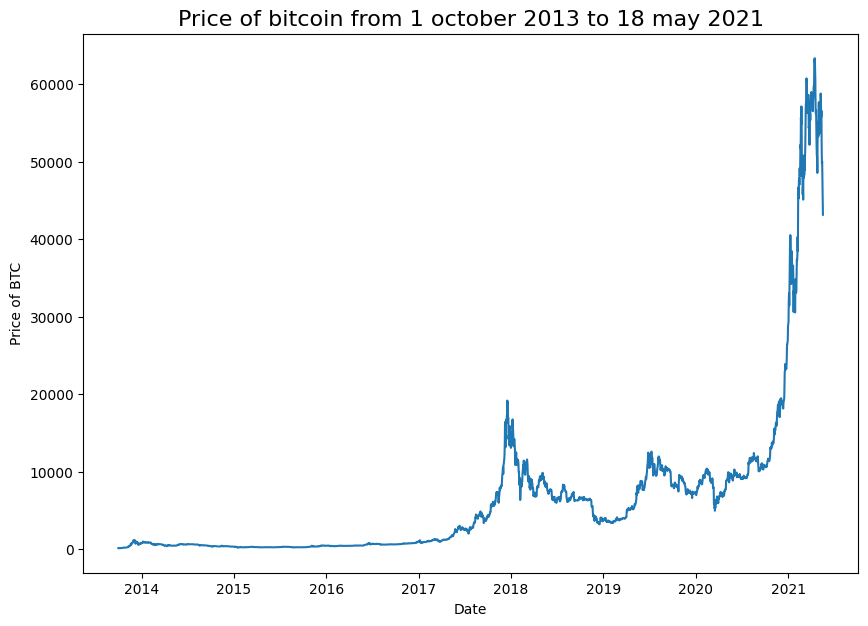

In [9]:
# Plot our python csv file
plt.figure(figsize = (10 , 7))
plt.plot(timesteps ,
         btc_price
         )
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16);


## Format data part 1 : Create train and test sets of our data

### Create train and test sets with time series data (wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()  #.index dediğimizde direkt date kısmını alıyoruz orayı index olarak çekmiştik yukarda.
prices = bitcoin_prices["Price"].to_numpy()
timesteps[ : 10] , prices[ : 10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(timesteps , # Dates
                                                       prices , # BTC prices
                                                       test_size = 0.2 ,
                                                       random_state  = 42
                                                       )
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((2229,), (558,), (2229,), (558,))

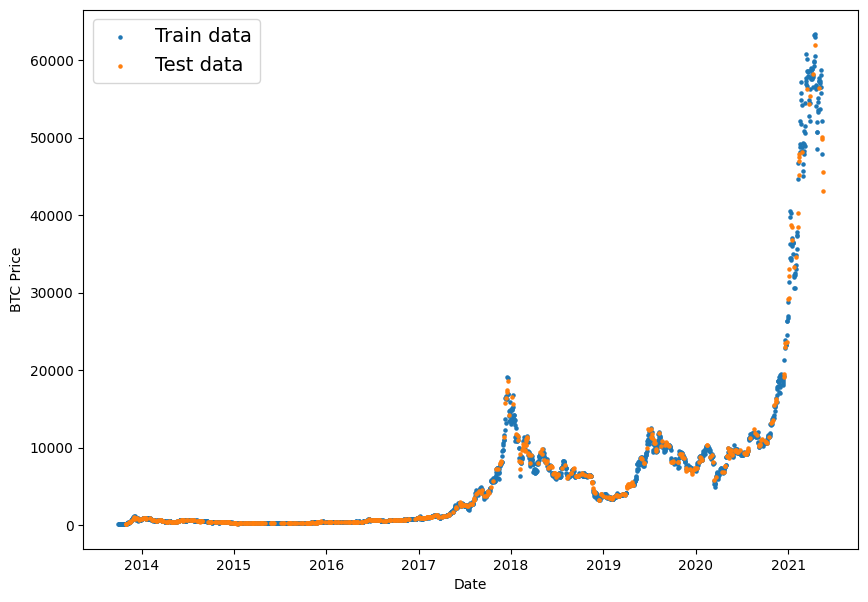

In [12]:
# Lets plot wrong train and test splits
plt.figure(figsize = ( 10 , 7 ))
plt.scatter(X_train , y_train , s = 5 , label = "Train data")
plt.scatter(X_test , y_test , s = 5 , label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train/test sets for time series (the right way)

#### train_test_split kullandıgımızda biz train ve test datamızı random sekilde olusturuyoruz yani shuffle etmis oluyoruz. Fakat biz time series problemlerinde future predict edecegimiz icin train datamızı bi yerde kesip tam ondan sonrasını test datamız yapmamız gerekiyor. Biz kendimiz bir future data olusturamayız zaten olusturabilsek bunları yapmamıza ihtiyacımız kalmazdı. Bu yüzden en eski tarihten belli bir zamana kadar train datamızı yapıcaz ve sonrasını da test datamız olarak belirleyeceğiz. Yani test datamızı aslında future gibi düsüneceğiz ve modelimiz ne kadar iyi calısıyor onu test edeceğiz.

In [13]:
# Create train/test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train , 20% test - you can change these values as needed , e.g. 90/10 or 95/5

# Create train data splits (everything before splits)
X_train , y_train = timesteps[ : split_size ] , prices[ : split_size]

# Create test data splits
X_test , y_test = timesteps[ split_size : ] , prices[ split_size : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

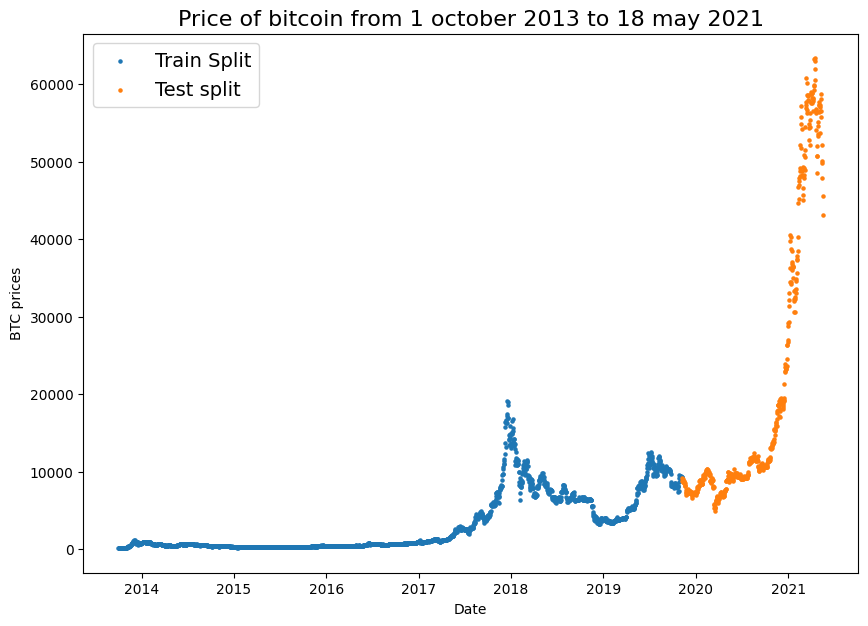

In [14]:
# Plot right splits
plt.figure(figsize = ( 10 , 7))
plt.scatter(X_train , y_train , s = 5 , label = "Train Split")
plt.scatter(X_test , y_test , s = 5 , label = "Test split")
plt.xlabel("Date")
plt.ylabel("BTC prices")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [15]:
## Create a function to plot time series data

def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  """
  Plots timesteps (a series of points in time) againts values (a series of values across timesteps)

  Parameters
  ----------------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot , default "."
  start : where to start plot (setting a value will index from start of timesteps and values)
  end : where to end plot ( similar to start but for end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)


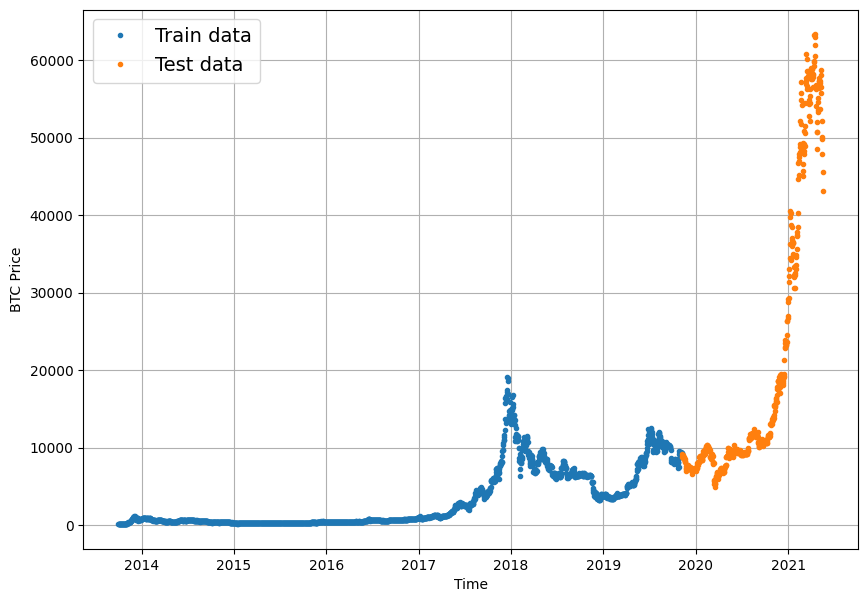

In [16]:
# Test out our plotting function
plt.figure(figsize = ( 10 , 7 ))  # Figure ü fonksiyon içinde kullanmamalıyız . matplotlib tidbit bu.
plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , label = "Test data")


## Modelling experiments

We have got some bitcoin historical data , to model it , lets run a series of modelling experiments and see which model performs best

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict


* Window size = number of timesteps we're going to use to predict horizon


Modelling experiments we're running:

* 0 - Naïve model (baseline)
* 1 - Dense model, horizon = 1, window = 7
* 2 - Same as 1, horizon = 1, window = 30
* 3 - Same as 1, horizon = 7, window = 30
* 4 - Conv1D
* 5 - LSTM
* 6 - Same as 1 (but with multivariate data)
* 7 - N-BEATs Algorithm
* 8 - Ensemble (multiple models optimized on different loss functions)
* 9 - Future prediction model (model to predict future values)
* 10 - Same as 1 (but with turkey 🦃 data introduced)

## Model 0 : Naive forcast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [17]:
# Create a naive forcast
naive_forcast = y_test[ : -1]
# Burda yukarıda yazdıgımızı yaptık aslında. naive forcast , y_testteki  için en sondaki y_test valuesunu sildik.

naive_forcast[ : 10 ] , naive_forcast[-10 : ]

# Aşağıdaki değerler aslında bizim naive_forcast predictionlarımız. Yani naive forcast 45604.615 bu değeri predict etmiş ama actual valuesu y_testin içindeki 43144.471. Yani y_testteki actual valueyu bir önceki value olarak predict ediyor.

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[-10 : ]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

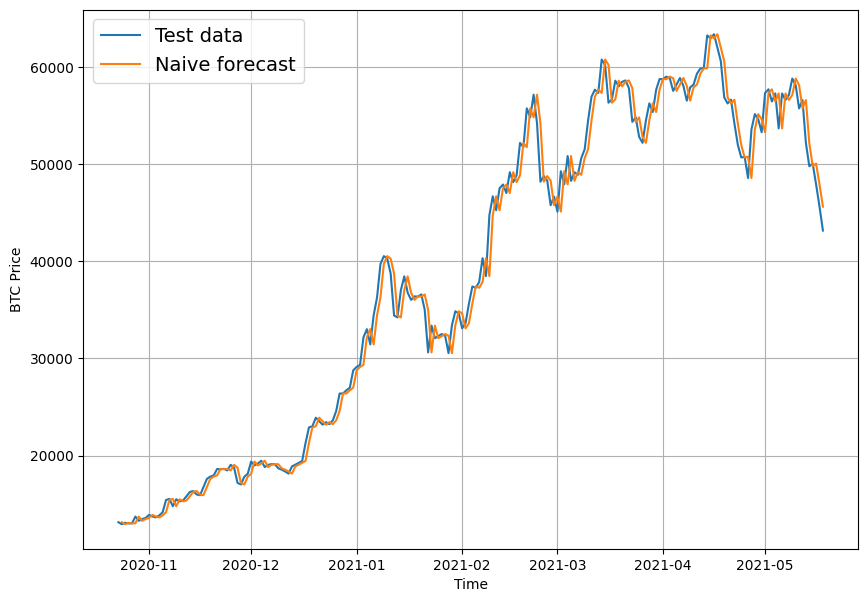

In [19]:
# Plot naive forecast
plt.figure(figsize = ( 10 , 7))
#plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , format = "-" , start = 350 , label = "Test data")
plot_time_series(timesteps = X_test[ 1 : ] , values = naive_forcast , format = "-" , start = 350 , label = "Naive forecast")
# We get everything after the first index with X_test[ 1 : ], bunu yapmak zorundayız çünkü naive forcastta son variable ı cut off ettik. Yani test datadan 1 eksik variable a sahip.


# Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autogoregressive come up? link : https://otexts.com/fpp3/simple-methods.html

# Our data is non-seasonal

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8 : https://otexts.com/fpp3/accuracy.html



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true , y_pred):
  """
  Implementing MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs( y_true - y_pred ))  # This is actually basic MAE (mean absolute error). abs mutlak değer.

  # Find MAE of naive forecast ( no seasonality )
  mae_naive_no_season = tf.reduce_mean(tf.abs( y_true[ 1 : ] - y_true[ : -1 ]  ))   # [ : -1]  means that  a new sequence that starts from the beginning and includes all elements except the last one.
  # [ 1 : ] means that ilk element hariç datanın hepsini alıyoruz.
  # Our seasionality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

  # Biz burda direkt aslında bütün modellerimizi naive forecasta göre evaluate edeceğimiz bir evaluation metrics oluşturduk. Biz az önce naive forecast modeli oluşturduğumuz için bu fonksiyonun içine y_pred olarak naive forecast predictionlarımızı gönderdiğimizde 1 değerini alıcaz. Keynote da >1 olunca naive forecasttan daha iyi demesinin sebebi de bu. Biz başka bir modeli MASE ile evaluate ettiğimizde naive forecast modelinden iyi mi yoksa kötü mü test edicez.


In [22]:
mean_absolute_scaled_error( y_true = y_test[ 1 : ] , y_pred = naive_forcast ).numpy()

0.9995699939182624

# All of our evaluation metrics in one function

In [23]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }







In [24]:
naive_results = evaluate_preds( y_true = y_test[ 1 : ] , y_pred =  naive_forcast)
naive_results
# Mae de çıkan sonuç bize y_testteki real valuelarımızın predictionlarda ortalama olarak ne kadar saptıgını söylüyor.
# y_test aslında modelimiz hakkında sadece küçük bir hint veriyor çünkü y_test datamızdaki değerler gelecekteki değerler değil yine past değerlere bakıyoruz.

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Other models you can use for baselines and for actual forecasts

We are focused on tensorflow and deep learning.

However there are plenty of other styles of time series forecasting models you may want to experiment with : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format data part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

Windowing for one week:
[ 0 , 1 , 2 , 3 , 4 , 5 , 6] -> [7]   (We have dataset like this 0 1 2(these are days in one week) , and we want to predict the next day which is [7]

[ 1 , 2 , 3 , 4 , 5 , 6 , 7] -> [8]   and if we want to predict 8. day , we will do it like this.

[ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] -> [9]  and this is for prediction of 9. day  

horizon is the output size , window is the input size.


In [25]:
# What we want to do with our bitcoin data?
print(f" We want to use this : {btc_price[ : 7]} , to predict this : {btc_price[7]}")

# First part is our datas and the second one is our labels

 We want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] , to predict this : 123.033


In [26]:
# Lets setup global variables for window and horizon size
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # Use the past 7 days (1 week) of bitcoin data to make the prediction

In [27]:
# Create function to label windowed data
def get_labelled_windows( x , horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  e.g. if horizon = 1
  Input =  [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] -> Output = ( [ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , [ 7 ] )  Yani outputu da inputun icinde alıyoruz sonrasında ayırıyoruz ve bizim outputumuz datamızı ve labelımızı iceren bir tuple olarak dönüyor.
  """
  return x[ :  ,  : -horizon ] ,  x[ : , -horizon : ] # For first x , get all rows and for columns , get all except last one(last one is our label) , For second x , get all rows and for columns , get just the last element(which is our label)

In [28]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window , test_label
# tf.range(8) : Bu ifade, 0 dan 7 ye kadar olan ardışık sayıları içeren bir tensörü oluşturur. TensorFlow'un tf.range() işlevi ardışık bir sayı dizisi oluşturmanızı sağlar.
# tf.expand_dims(tf.range(8) + 1, axis=0): Bu adım, önceki tensörü boyutunu genişleterek 2B bir tensöre dönüştürür. tf.expand_dims() işlevi, belirli bir eksen boyunca boyut eklemek için kullanılır. Bu durumda, axis=0 ile, yeni bir boyut eklenerek satır boyutu artırılır. Bu işlem sonucunda, örneğin, [1, 2, 3, 4, 5, 6, 7, 8] dizisi [1, 8] boyutlarında bir tensöre dönüşecektir.
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


We have got a way to label our windowed data.

However , this only works on a small scale.

We need a way to do the above across our entire time series .

We could do this with python for loops , however , for large time series , that would be quite slow.

To speed things up , we will leverage numpy's array indexing

 Our function will:

 1. Create a window step of spesific window size ( e.g. [ 0, 1 , 2 , 3 , 4 , 5 , 6 ]  )
 2. Use numpy indexing to create a 2D array of multiple window steps, for example:

 [ [ 0, 1 , 2 , 3 , 4 , 5 , 6 ] ,

 [ 1 , 2 , 3 , 4 , 5 , 6 , 7] ,

 [ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] ]

 3. Uses the 2D array of multiple window steps (from step 2 ) to index on a target series ( e.g. the historical prices of bitcoin) .
 4. Uses our ' get_labelled_windows() ' function we created above to turn the window steps into windows with specified horizon

Our algorithm is sliding windows


In [29]:
import numpy as np

In [30]:
# Create a function to view numpy arrays as windows
def make_windows( x , window_size = WINDOW_SIZE , horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of a window_size with horizon size labels.
  """
  # 1. Create a window of spesific window_size ( add horizon on the end for labelling later )
  window_step = np.expand_dims(np.arange(window_size + horizon) , axis = 0)   # window_size + horizon kadar 0 dan başlayan liste oluşturur.

  # 2. Create a 2D array of multiple window steps ( minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)) , axis = 0).T    #  (window_size + horizon - 1) bu kısım datamızın en sonuna geldiğinde durmak için. .T for transpose. Create 2D array of windows of size window_size
  #print(f"Window indexes : {window_indexes , window_indexes.shape }")

  # 3. Index on the target array ( a time series ) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows , labels = get_labelled_windows(windowed_array , horizon = horizon)
  return windows , labels



In [31]:
full_windows , full_labels = make_windows(prices)
len(full_windows) , len(full_labels)  # Price dan 7 eksik çünkü bizim windowumuz 8 elementten olusuyo bu yüzden son 7 elemanı dahil etmiyoruz windowlarımıza. Bunu sağlayan kısım da (window_size + horizon - 1) bu aslında.

(2780, 2780)

In [32]:
len(prices)

2787

In [33]:
# Viewing the first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]} , ->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] , ->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] , ->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] , ->  Label : [125.96116]


# There is a function which does similar to the above in tf.keras.preprocessing.timeseries_dataset_from_array

## Turning windows into training and test sets. Training ve test setlerimizi windowlarımızı oluşturduktan sonra yapıyoruz.

In [34]:
# Make the train/test splits with function

def make_train_test_splits(windows , labels , test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * ( 1 - test_split )) # this will be default to 80% train / 20% test
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows , test_windows , train_labels , test_labels



In [35]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [36]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint

Because our modelling performance will fluctuate from experiment to experiment , we are going to write a model checkpoint so we can compare apples to apples.

More spesifically , we want to compare each of our models's best performances againts the other model's best performances.

For example if our model performs the best on epoch 55 (  but we are training for 100 epochs ) , we want to load and evaluate the model saved on epoch 55.

In [37]:
import os

def create_model_checkpoint(model_name , save_path = "model_experiments" ):
  return tf.keras.callbacks.ModelCheckpoint( filepath = os.path.join(save_path , model_name) , verbose = 0 , save_best_only = True)


# Model : Simple Dense Model ( window = 7 , horizon = 1)

Our firs deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and relu.
* An output layer with linear activation ( or no activation ).
* Adam optimizer and MAE loss function.
* Batch size of 128 (previously we used 32 but here we have number data and smaller data so we can use 128 for fitting fast). ( Datamızın icindeki verilerin büyüklügü cok degilse batch size arttırıyoruz bizim datamız sayılardan olusuyor bu yüzden arttırdık cok az yer kaplıyor.)
* 100 epochs.

Why these values?

I picked them out of experimentation.

** Note: **
* Hyperparameters : values a machine learning practitioner can adjust themselves.

* Parameters : values a model learns on its own



In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON , activation = "linear")  # Linear activation is the same as having no activation
    ]
  ,  name = "model_1_dense"
)
# Compile a model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )
# Fit the model
hist_1 = model_1.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    verbose = 1 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint( model_name = model_1.name )]

)


Epoch 1/100
 1/18 [>.............................] - ETA: 2:00 - loss: 1258.7626 - mae: 1258.7626

18/18 [==============================] - 8s 60ms/step - loss: 397.0454 - mae: 397.0454 - val_loss: 1720.4807 - val_mae: 1720.4807
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 192.0100 - mae: 192.0100

18/18 [==============================] - 2s 119ms/step - loss: 185.6067 - mae: 185.6067 - val_loss: 958.4551 - val_mae: 958.4551
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 160.6031 - mae: 160.6031

18/18 [==============================] - 2s 100ms/step - loss: 158.2854 - mae: 158.2854 - val_loss: 877.0549 - val_mae: 877.0549
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 153.2841 - mae: 153.2841 - val_loss: 910.1719 - val_mae: 910.1719
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 147.5527 - mae: 147.5527

18/18 [==============================] - 1s 66ms/step - loss: 144.0054 - mae: 144.0054 - val_loss: 790.1158 - val_mae: 790.1158
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 134.8591 - mae: 134.8591

18/18 [==============================] - 1s 68ms/step - loss: 135.4369 - mae: 135.4369 - val_loss: 770.2042 - val_mae: 770.2042
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 132.2346 - mae: 132.2346 - val_loss: 779.1884 - val_mae: 779.1884
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 129.9966 - mae: 129.9966

18/18 [==============================] - 1s 51ms/step - loss: 128.9639 - mae: 128.9639 - val_loss: 698.1006 - val_mae: 698.1006
Epoch 9/100
10/18 [===============>..............] - ETA: 0s - loss: 128.0161 - mae: 128.0161

18/18 [==============================] - 1s 57ms/step - loss: 129.3846 - mae: 129.3846 - val_loss: 694.3724 - val_mae: 694.3724
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 127.4256 - mae: 127.4256

18/18 [==============================] - 1s 88ms/step - loss: 131.1057 - mae: 131.1057 - val_loss: 666.8498 - val_mae: 666.8498
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 121.1711 - mae: 121.1711 - val_loss: 699.0773 - val_mae: 699.0773
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 126.3221 - mae: 126.3221 - val_loss: 804.7209 - val_mae: 804.7209
Epoch 13/100
18/18 [==============================] - 0s 11ms/step - loss: 139.4337 - mae: 139.4337 - val_loss: 672.0012 - val_mae: 672.0012
Epoch 14/100
18/18 [==============================] - 0s 12ms/step - loss: 125.1975 - mae: 125.1975 - val_loss: 674.4536 - val_mae: 674.4536
Epoch 15/100
18/18 [==============================] - 0s 12ms/step - loss: 128.5349 - mae: 128.5349 - val_loss: 698.9010 - val_mae: 698.9010
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 116.4144 - mae: 116.4144

18/18 [==============================] - 1s 73ms/step - loss: 118.4586 - mae: 118.4586 - val_loss: 631.4434 - val_mae: 631.4434
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 117.1242 - mae: 117.1242 - val_loss: 662.8801 - val_mae: 662.8801
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 118.8446 - mae: 118.8446

18/18 [==============================] - 1s 69ms/step - loss: 114.9153 - mae: 114.9153 - val_loss: 619.3906 - val_mae: 619.3906
Epoch 19/100
18/18 [==============================] - 0s 13ms/step - loss: 115.5790 - mae: 115.5790 - val_loss: 664.7593 - val_mae: 664.7593
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 113.2118 - mae: 113.2118

18/18 [==============================] - 2s 106ms/step - loss: 113.3267 - mae: 113.3267 - val_loss: 617.7442 - val_mae: 617.7442
Epoch 21/100
18/18 [==============================] - 0s 13ms/step - loss: 118.2524 - mae: 118.2524 - val_loss: 628.0165 - val_mae: 628.0165
Epoch 22/100
 9/18 [==============>...............] - ETA: 0s - loss: 135.7732 - mae: 135.7732

18/18 [==============================] - 1s 66ms/step - loss: 115.6213 - mae: 115.6213 - val_loss: 613.0367 - val_mae: 613.0367
Epoch 23/100
12/18 [===================>..........] - ETA: 0s - loss: 110.4385 - mae: 110.4385

18/18 [==============================] - 1s 54ms/step - loss: 113.2968 - mae: 113.2968 - val_loss: 603.7924 - val_mae: 603.7924
Epoch 24/100
18/18 [==============================] - 0s 9ms/step - loss: 111.9122 - mae: 111.9122 - val_loss: 607.5679 - val_mae: 607.5679
Epoch 25/100
18/18 [==============================] - 0s 10ms/step - loss: 113.6744 - mae: 113.6744 - val_loss: 606.7261 - val_mae: 606.7261
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 112.4956 - mae: 112.4956

18/18 [==============================] - 1s 65ms/step - loss: 115.6673 - mae: 115.6673 - val_loss: 601.2391 - val_mae: 601.2391
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 119.8274 - mae: 119.8274

18/18 [==============================] - 1s 36ms/step - loss: 115.9825 - mae: 115.9825 - val_loss: 594.6495 - val_mae: 594.6495
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3963 - mae: 111.3963 - val_loss: 600.1500 - val_mae: 600.1500
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8813 - mae: 109.8813 - val_loss: 618.9943 - val_mae: 618.9943
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 126.2966 - mae: 126.2966

18/18 [==============================] - 1s 31ms/step - loss: 117.4216 - mae: 117.4216 - val_loss: 587.5290 - val_mae: 587.5290
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3901 - mae: 120.3901 - val_loss: 726.9765 - val_mae: 726.9765
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8907 - mae: 114.8907 - val_loss: 593.4839 - val_mae: 593.4839
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5939 - mae: 109.5939 - val_loss: 605.0437 - val_mae: 605.0437
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9383 - mae: 131.9383

18/18 [==============================] - 0s 29ms/step - loss: 110.3518 - mae: 110.3518 - val_loss: 585.9779 - val_mae: 585.9779
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 111.1036 - mae: 111.1036

18/18 [==============================] - 1s 31ms/step - loss: 110.9548 - mae: 110.9548 - val_loss: 581.8970 - val_mae: 581.8970
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 150.3179 - mae: 150.3179

18/18 [==============================] - 1s 29ms/step - loss: 112.8477 - mae: 112.8477 - val_loss: 579.0488 - val_mae: 579.0488
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6419 - mae: 111.6419 - val_loss: 593.0953 - val_mae: 593.0953
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 101.3764 - mae: 101.3764

18/18 [==============================] - 1s 30ms/step - loss: 111.2444 - mae: 111.2444 - val_loss: 578.1107 - val_mae: 578.1107
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0343 - mae: 110.0343 - val_loss: 581.7338 - val_mae: 581.7338
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9455 - mae: 109.9455 - val_loss: 634.7591 - val_mae: 634.7591
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8872 - mae: 109.8872 - val_loss: 609.3812 - val_mae: 609.3812
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0221 - mae: 114.0221 - val_loss: 678.5231 - val_mae: 678.5231
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2326 - mae: 115.2326 - val_loss: 663.4904 - val_mae: 663.4904
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4644 - mae: 113.4644 - val_loss: 624.8314 - val_mae: 624.8314
Epoch 45/100
18/18 [============

18/18 [==============================] - 0s 28ms/step - loss: 110.5174 - mae: 110.5174 - val_loss: 573.9214 - val_mae: 573.9214
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8684 - mae: 106.8684 - val_loss: 575.9255 - val_mae: 575.9255
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 106.5039 - mae: 106.5039 - val_loss: 733.9695 - val_mae: 733.9695
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3681 - mae: 111.3681 - val_loss: 580.7773 - val_mae: 580.7773
Epoch 58/100
13/18 [====================>.........] - ETA: 0s - loss: 107.6038 - mae: 107.6038

18/18 [==============================] - 1s 44ms/step - loss: 107.2833 - mae: 107.2833 - val_loss: 573.5292 - val_mae: 573.5292
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 106.6483 - mae: 106.6483 - val_loss: 624.0649 - val_mae: 624.0649
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 114.6498 - mae: 114.6498 - val_loss: 646.1655 - val_mae: 646.1655
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4012 - mae: 112.4012 - val_loss: 601.9139 - val_mae: 601.9139
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 106.6944 - mae: 106.6944 - val_loss: 583.3695 - val_mae: 583.3695
Epoch 63/100
16/18 [=========================>....] - ETA: 0s - loss: 107.1432 - mae: 107.1432

18/18 [==============================] - 1s 59ms/step - loss: 106.4204 - mae: 106.4204 - val_loss: 573.1417 - val_mae: 573.1417
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 106.6465 - mae: 106.6465 - val_loss: 627.8484 - val_mae: 627.8484
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 139.9667 - mae: 139.9667

18/18 [==============================] - 0s 29ms/step - loss: 109.8046 - mae: 109.8046 - val_loss: 572.7069 - val_mae: 572.7069
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 107.5274 - mae: 107.5274 - val_loss: 579.5273 - val_mae: 579.5273
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6518 - mae: 106.6518 - val_loss: 647.7991 - val_mae: 647.7991
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7247 - mae: 106.7247 - val_loss: 575.7750 - val_mae: 575.7750
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7305 - mae: 108.7305 - val_loss: 644.5482 - val_mae: 644.5482
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 119.5395 - mae: 119.5395 - val_loss: 723.8060 - val_mae: 723.8060
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 99.9400 - mae: 99.9400

18/18 [==============================] - 1s 29ms/step - loss: 109.0821 - mae: 109.0821 - val_loss: 571.4858 - val_mae: 571.4858
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 93.7717 - mae: 93.7717

18/18 [==============================] - 1s 29ms/step - loss: 110.5820 - mae: 110.5820 - val_loss: 570.7440 - val_mae: 570.7440
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 110.5153 - mae: 110.5153 - val_loss: 577.7214 - val_mae: 577.7214
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7635 - mae: 110.7635 - val_loss: 595.1935 - val_mae: 595.1935
Epoch 75/100
15/18 [========================>.....] - ETA: 0s - loss: 111.3048 - mae: 111.3048

18/18 [==============================] - 1s 30ms/step - loss: 111.0079 - mae: 111.0079 - val_loss: 568.0323 - val_mae: 568.0323
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4276 - mae: 111.4276 - val_loss: 573.4378 - val_mae: 573.4378
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6061 - mae: 108.6061 - val_loss: 572.9867 - val_mae: 572.9867
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4487 - mae: 109.4487 - val_loss: 608.5733 - val_mae: 608.5733
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8973 - mae: 108.8973 - val_loss: 584.6531 - val_mae: 584.6531
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0697 - mae: 112.0697 - val_loss: 585.6115 - val_mae: 585.6115
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8132 - mae: 105.8132 - val_loss: 586.7709 - val_mae: 586.7709
Epoch 82/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 111.3043 - mae: 111.3043 - val_loss: 567.0020 - val_mae: 567.0020
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8871 - mae: 109.8871 - val_loss: 582.0952 - val_mae: 582.0952


In [39]:
# Evaluate our model
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 582.0950 - mae: 582.0950


[582.094970703125, 582.094970703125]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 567.0021 - mae: 567.0021


[567.0020751953125, 567.0020751953125]

## Making forecast with a model ( on the test dataset)

To make forecasts on the test dataset (these wont be actual forecasts , they are only psuedo forecasts because actual forecast are into the future ).  Test datamız da aslında gecmiste olan datalar oldugu icin sadece biz modelimiz hakkında nasıl calıstıgını görmek icin bunu future gibi kabul ediyoruz.)

In [41]:
model_1_pred = model_1.predict(test_windows)
model_1_pred

18/18 [==============================] - 0s 1ms/step


array([[ 8841.133 ],
       [ 8770.667 ],
       [ 9028.788 ],
       [ 8780.283 ],
       [ 8740.368 ],
       [ 8718.648 ],
       [ 8689.359 ],
       [ 8512.028 ],
       [ 8451.361 ],
       [ 8525.84  ],
       [ 8248.643 ],
       [ 8108.925 ],
       [ 8053.397 ],
       [ 7673.3433],
       [ 7307.4253],
       [ 7268.8335],
       [ 7083.2   ],
       [ 7209.6772],
       [ 7132.2563],
       [ 7487.31  ],
       [ 7431.2715],
       [ 7714.809 ],
       [ 7600.645 ],
       [ 7427.407 ],
       [ 7334.338 ],
       [ 7318.8657],
       [ 7233.7573],
       [ 7362.7075],
       [ 7506.2695],
       [ 7556.0386],
       [ 7560.3965],
       [ 7370.495 ],
       [ 7253.259 ],
       [ 7192.522 ],
       [ 7190.19  ],
       [ 7227.3433],
       [ 7099.823 ],
       [ 7101.5923],
       [ 6902.4497],
       [ 6614.0967],
       [ 7299.099 ],
       [ 7231.5264],
       [ 7174.804 ],
       [ 7237.8057],
       [ 7289.613 ],
       [ 7216.9663],
       [ 7213.926 ],
       [ 7230

In [42]:
model_1_results = evaluate_preds( y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_1_pred ) )
model_1_results   # Now we are doing predictions with best weights because we load our model with ModelCheckpoint

{'mae': 567.0022,
 'mse': 1164141.5,
 'rmse': 1078.9539,
 'mape': 2.5358,
 'mase': 0.9960658}

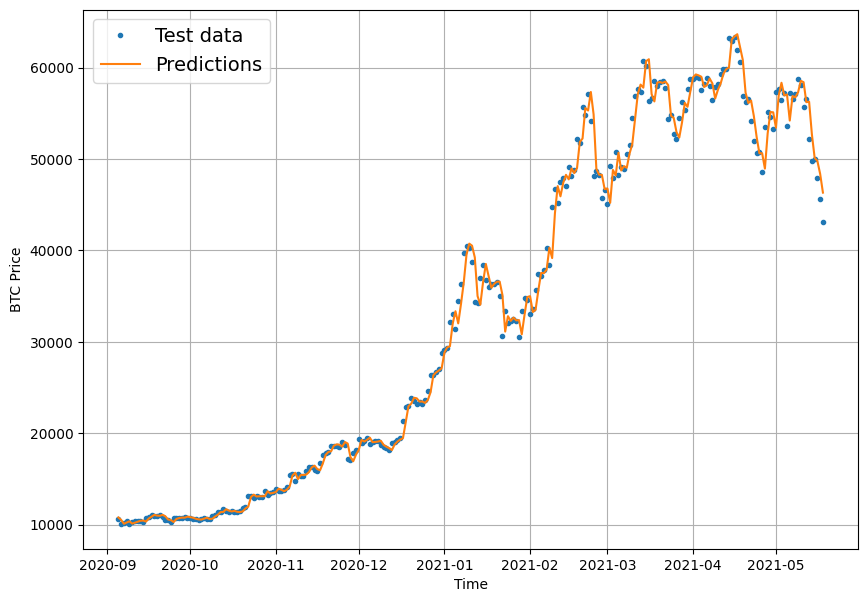

In [43]:
# Lets plot our model 1 predictions
offset = 300
plt.figure(figsize = ( 10 , 7 ))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : ,  0] , start = offset , label =  "Test data" )  # X_test kullanıyoruz çünkü windowların dimensionalityleri sebebiyle plot edemiyoruz. Sadece x_testte doğru indexleme yapmamız gerekiyor
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_1_pred , start = offset , format = "-" , label =  "Predictions" )

# Model 2 Dense : Window = 30 , Horizon = 1

In [44]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [45]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)


In [46]:
# Model 2 : Same as with model 1 but window size = 30
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_2_dense"
)
# Compile a model

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_2 = model_2.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 827.4601 - mae: 827.4601   

18/18 [==============================] - 2s 39ms/step - loss: 801.0922 - mae: 801.0922 - val_loss: 1261.3774 - val_mae: 1261.3774
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 307.3708 - mae: 307.3708

18/18 [==============================] - 1s 31ms/step - loss: 317.4190 - mae: 317.4190 - val_loss: 1257.9619 - val_mae: 1257.9619
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 259.5047 - mae: 259.5047

18/18 [==============================] - 1s 39ms/step - loss: 220.1596 - mae: 220.1596 - val_loss: 1135.9902 - val_mae: 1135.9902
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 201.3546 - mae: 201.3546

18/18 [==============================] - 1s 44ms/step - loss: 202.9794 - mae: 202.9794 - val_loss: 1104.4199 - val_mae: 1104.4199
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 195.6485 - mae: 195.6485 - val_loss: 1119.0514 - val_mae: 1119.0514
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 193.0287 - mae: 193.0287 - val_loss: 1151.3497 - val_mae: 1151.3497
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 177.8232 - mae: 177.8232

18/18 [==============================] - 1s 45ms/step - loss: 180.0730 - mae: 180.0730 - val_loss: 999.0724 - val_mae: 999.0724
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 172.5257 - mae: 172.5257

18/18 [==============================] - 1s 31ms/step - loss: 171.3856 - mae: 171.3856 - val_loss: 975.3942 - val_mae: 975.3942
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 183.5397 - mae: 183.5397

18/18 [==============================] - 1s 30ms/step - loss: 168.2379 - mae: 168.2379 - val_loss: 940.6935 - val_mae: 940.6935
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 166.4833 - mae: 166.4833 - val_loss: 1033.8339 - val_mae: 1033.8339
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 169.1856 - mae: 169.1856

18/18 [==============================] - 1s 46ms/step - loss: 162.4147 - mae: 162.4147 - val_loss: 901.4300 - val_mae: 901.4300
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 128.6728 - mae: 128.6728

18/18 [==============================] - 1s 29ms/step - loss: 156.2249 - mae: 156.2249 - val_loss: 845.3566 - val_mae: 845.3566
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 151.0735 - mae: 151.0735 - val_loss: 921.2770 - val_mae: 921.2770
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 212.0639 - mae: 212.0639

18/18 [==============================] - 1s 30ms/step - loss: 150.7964 - mae: 150.7964 - val_loss: 820.0441 - val_mae: 820.0441
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 191.3677 - mae: 191.3677

18/18 [==============================] - 1s 31ms/step - loss: 148.2506 - mae: 148.2506 - val_loss: 806.9527 - val_mae: 806.9527
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 153.4826 - mae: 153.4826 - val_loss: 847.4993 - val_mae: 847.4993
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 150.0822 - mae: 150.0822 - val_loss: 1220.6195 - val_mae: 1220.6195
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 162.3413 - mae: 162.3413 - val_loss: 1034.4595 - val_mae: 1034.4595
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 157.9376 - mae: 157.9376

18/18 [==============================] - 1s 42ms/step - loss: 157.9376 - mae: 157.9376 - val_loss: 760.5681 - val_mae: 760.5681
Epoch 20/100
18/18 [==============================] - 0s 13ms/step - loss: 142.3046 - mae: 142.3046 - val_loss: 794.2599 - val_mae: 794.2599
Epoch 21/100
18/18 [==============================] - 0s 14ms/step - loss: 149.4148 - mae: 149.4148 - val_loss: 899.1970 - val_mae: 899.1970
Epoch 22/100
18/18 [==============================] - 0s 15ms/step - loss: 151.6444 - mae: 151.6444 - val_loss: 797.6809 - val_mae: 797.6809
Epoch 23/100
18/18 [==============================] - 0s 13ms/step - loss: 144.0515 - mae: 144.0515 - val_loss: 1071.2360 - val_mae: 1071.2360
Epoch 24/100
10/18 [===============>..............] - ETA: 0s - loss: 136.4555 - mae: 136.4555

18/18 [==============================] - 2s 108ms/step - loss: 137.8210 - mae: 137.8210 - val_loss: 743.7664 - val_mae: 743.7664
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 132.9559 - mae: 132.9559 - val_loss: 896.1559 - val_mae: 896.1559
Epoch 26/100
18/18 [==============================] - 0s 9ms/step - loss: 136.6294 - mae: 136.6294 - val_loss: 1023.5770 - val_mae: 1023.5770
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 149.5742 - mae: 149.5742

18/18 [==============================] - 1s 48ms/step - loss: 163.3792 - mae: 163.3792 - val_loss: 715.8693 - val_mae: 715.8693
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 132.7400 - mae: 132.7400 - val_loss: 1076.8835 - val_mae: 1076.8835
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 149.6641 - mae: 149.6641

18/18 [==============================] - 1s 38ms/step - loss: 151.4290 - mae: 151.4290 - val_loss: 714.6711 - val_mae: 714.6711
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 133.9265 - mae: 133.9265 - val_loss: 818.7847 - val_mae: 818.7847
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 135.6096 - mae: 135.6096

18/18 [==============================] - 1s 60ms/step - loss: 132.8649 - mae: 132.8649 - val_loss: 697.0120 - val_mae: 697.0120
Epoch 32/100
18/18 [==============================] - 0s 13ms/step - loss: 138.8689 - mae: 138.8689 - val_loss: 1053.7975 - val_mae: 1053.7975
Epoch 33/100
18/18 [==============================] - 0s 16ms/step - loss: 144.5454 - mae: 144.5454 - val_loss: 864.3323 - val_mae: 864.3323
Epoch 34/100
18/18 [==============================] - 0s 10ms/step - loss: 129.6930 - mae: 129.6930 - val_loss: 797.9890 - val_mae: 797.9890
Epoch 35/100
18/18 [==============================] - 0s 16ms/step - loss: 145.4967 - mae: 145.4967 - val_loss: 726.3194 - val_mae: 726.3194
Epoch 36/100
18/18 [==============================] - 0s 18ms/step - loss: 134.9398 - mae: 134.9398 - val_loss: 700.4046 - val_mae: 700.4046
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 132.0479 - mae: 132.0479

18/18 [==============================] - 1s 71ms/step - loss: 128.3007 - mae: 128.3007 - val_loss: 674.5164 - val_mae: 674.5164
Epoch 38/100
18/18 [==============================] - 0s 10ms/step - loss: 131.9104 - mae: 131.9104 - val_loss: 702.0637 - val_mae: 702.0637
Epoch 39/100
18/18 [==============================] - 0s 11ms/step - loss: 125.7412 - mae: 125.7412 - val_loss: 795.7888 - val_mae: 795.7888
Epoch 40/100
13/18 [====================>.........] - ETA: 0s - loss: 131.1539 - mae: 131.1539

18/18 [==============================] - 1s 52ms/step - loss: 128.6351 - mae: 128.6351 - val_loss: 670.2363 - val_mae: 670.2363
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 122.3452 - mae: 122.3452 - val_loss: 707.0368 - val_mae: 707.0368
Epoch 42/100
18/18 [==============================] - 0s 13ms/step - loss: 128.8219 - mae: 128.8219 - val_loss: 762.9184 - val_mae: 762.9184
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 131.2865 - mae: 131.2865 - val_loss: 782.8100 - val_mae: 782.8100
Epoch 44/100
12/18 [===================>..........] - ETA: 0s - loss: 133.8629 - mae: 133.8629

18/18 [==============================] - 1s 58ms/step - loss: 130.5956 - mae: 130.5956 - val_loss: 664.3024 - val_mae: 664.3024
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 120.3763 - mae: 120.3763

18/18 [==============================] - 1s 86ms/step - loss: 119.8234 - mae: 119.8234 - val_loss: 657.4269 - val_mae: 657.4269
Epoch 46/100
18/18 [==============================] - 0s 14ms/step - loss: 126.9960 - mae: 126.9960 - val_loss: 725.1090 - val_mae: 725.1090
Epoch 47/100
18/18 [==============================] - 0s 15ms/step - loss: 122.1663 - mae: 122.1663 - val_loss: 705.4854 - val_mae: 705.4854
Epoch 48/100
18/18 [==============================] - 0s 10ms/step - loss: 125.2098 - mae: 125.2098 - val_loss: 699.6750 - val_mae: 699.6750
Epoch 49/100
15/18 [========================>.....] - ETA: 0s - loss: 120.3498 - mae: 120.3498

18/18 [==============================] - 1s 53ms/step - loss: 121.9503 - mae: 121.9503 - val_loss: 647.6311 - val_mae: 647.6311
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 137.7029 - mae: 137.7029 - val_loss: 1019.2491 - val_mae: 1019.2491
Epoch 51/100
18/18 [==============================] - 0s 13ms/step - loss: 138.7569 - mae: 138.7569 - val_loss: 1026.8005 - val_mae: 1026.8005
Epoch 52/100
18/18 [==============================] - 0s 10ms/step - loss: 134.0157 - mae: 134.0157 - val_loss: 735.3604 - val_mae: 735.3604
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 129.9450 - mae: 129.9450 - val_loss: 782.3051 - val_mae: 782.3050
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 127.3856 - mae: 127.3856 - val_loss: 1063.2958 - val_mae: 1063.2958
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 150.6562 - mae: 150.6562 - val_loss: 914.9221 - val_mae: 914.9221
Epoch 56/100
18/18 [====

18/18 [==============================] - 1s 63ms/step - loss: 146.6717 - mae: 146.6717 - val_loss: 633.0665 - val_mae: 633.0665
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 120.1112 - mae: 120.1112 - val_loss: 1064.2283 - val_mae: 1064.2283
Epoch 58/100
18/18 [==============================] - 0s 13ms/step - loss: 135.1719 - mae: 135.1719 - val_loss: 745.7371 - val_mae: 745.7371
Epoch 59/100
18/18 [==============================] - 0s 13ms/step - loss: 157.9339 - mae: 157.9339 - val_loss: 767.3267 - val_mae: 767.3267
Epoch 60/100
18/18 [==============================] - 0s 15ms/step - loss: 126.4052 - mae: 126.4052 - val_loss: 667.3911 - val_mae: 667.3911
Epoch 61/100
 9/18 [==============>...............] - ETA: 0s - loss: 117.7063 - mae: 117.7063

18/18 [==============================] - 1s 84ms/step - loss: 121.4651 - mae: 121.4651 - val_loss: 632.4042 - val_mae: 632.4042
Epoch 62/100
18/18 [==============================] - 0s 19ms/step - loss: 119.6862 - mae: 119.6862 - val_loss: 744.9879 - val_mae: 744.9879
Epoch 63/100
18/18 [==============================] - 0s 14ms/step - loss: 127.2818 - mae: 127.2818 - val_loss: 640.6125 - val_mae: 640.6125
Epoch 64/100
18/18 [==============================] - 0s 17ms/step - loss: 122.6699 - mae: 122.6699 - val_loss: 680.7145 - val_mae: 680.7145
Epoch 65/100
18/18 [==============================] - 0s 14ms/step - loss: 117.6405 - mae: 117.6405 - val_loss: 634.5542 - val_mae: 634.5542
Epoch 66/100
18/18 [==============================] - 0s 13ms/step - loss: 117.2133 - mae: 117.2133 - val_loss: 686.9016 - val_mae: 686.9016
Epoch 67/100
18/18 [==============================] - 0s 10ms/step - loss: 115.0526 - mae: 115.0526 - val_loss: 659.7002 - val_mae: 659.7002
Epoch 68/100
14/18 [======

18/18 [==============================] - 1s 66ms/step - loss: 117.9108 - mae: 117.9108 - val_loss: 626.6299 - val_mae: 626.6299
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 116.7186 - mae: 116.7186 - val_loss: 1100.7805 - val_mae: 1100.7805
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 154.9482 - mae: 154.9482 - val_loss: 646.1373 - val_mae: 646.1373
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 126.1043 - mae: 126.1043 - val_loss: 691.1796 - val_mae: 691.1796
Epoch 72/100
18/18 [==============================] - 0s 8ms/step - loss: 119.2223 - mae: 119.2223 - val_loss: 647.4679 - val_mae: 647.4679
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 114.4498 - mae: 114.4498 - val_loss: 833.4816 - val_mae: 833.4816
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 122.0138 - mae: 122.0138 - val_loss: 642.4068 - val_mae: 642.4067
Epoch 75/100
18/18 [==========

18/18 [==============================] - 2s 92ms/step - loss: 127.2195 - mae: 127.2195 - val_loss: 620.1381 - val_mae: 620.1381
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 115.2727 - mae: 115.2727 - val_loss: 785.7703 - val_mae: 785.7703
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 121.3972 - mae: 121.3972 - val_loss: 622.3347 - val_mae: 622.3347
Epoch 82/100
18/18 [==============================] - 0s 12ms/step - loss: 111.1172 - mae: 111.1172 - val_loss: 621.2253 - val_mae: 621.2253
Epoch 83/100
13/18 [====================>.........] - ETA: 0s - loss: 113.3291 - mae: 113.3291

18/18 [==============================] - 1s 62ms/step - loss: 116.9936 - mae: 116.9936 - val_loss: 613.5071 - val_mae: 613.5071
Epoch 84/100
18/18 [==============================] - 0s 18ms/step - loss: 130.1498 - mae: 130.1498 - val_loss: 920.0846 - val_mae: 920.0846
Epoch 85/100
18/18 [==============================] - 0s 17ms/step - loss: 157.4049 - mae: 157.4049 - val_loss: 781.9345 - val_mae: 781.9345
Epoch 86/100
18/18 [==============================] - 0s 11ms/step - loss: 127.5869 - mae: 127.5869 - val_loss: 685.8597 - val_mae: 685.8597
Epoch 87/100
18/18 [==============================] - 0s 9ms/step - loss: 113.0911 - mae: 113.0911 - val_loss: 708.9228 - val_mae: 708.9228
Epoch 88/100
18/18 [==============================] - 0s 13ms/step - loss: 115.4183 - mae: 115.4183 - val_loss: 661.1912 - val_mae: 661.1912
Epoch 89/100
18/18 [==============================] - 0s 15ms/step - loss: 117.0033 - mae: 117.0033 - val_loss: 693.6113 - val_mae: 693.6113
Epoch 90/100
18/18 [=======

18/18 [==============================] - 1s 62ms/step - loss: 117.8830 - mae: 117.8830 - val_loss: 610.3012 - val_mae: 610.3012
Epoch 92/100
18/18 [==============================] - 0s 9ms/step - loss: 109.6519 - mae: 109.6519 - val_loss: 711.9390 - val_mae: 711.9390
Epoch 93/100
18/18 [==============================] - 0s 12ms/step - loss: 125.3519 - mae: 125.3519 - val_loss: 800.7274 - val_mae: 800.7274
Epoch 94/100
18/18 [==============================] - 0s 9ms/step - loss: 130.2163 - mae: 130.2163 - val_loss: 1175.0779 - val_mae: 1175.0779
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 143.6177 - mae: 143.6177

18/18 [==============================] - 2s 92ms/step - loss: 134.4223 - mae: 134.4223 - val_loss: 600.9592 - val_mae: 600.9592
Epoch 96/100
18/18 [==============================] - 0s 16ms/step - loss: 116.6860 - mae: 116.6860 - val_loss: 695.1309 - val_mae: 695.1309
Epoch 97/100
18/18 [==============================] - 0s 12ms/step - loss: 118.2241 - mae: 118.2241 - val_loss: 724.9546 - val_mae: 724.9546
Epoch 98/100
18/18 [==============================] - 0s 16ms/step - loss: 129.0793 - mae: 129.0793 - val_loss: 680.1758 - val_mae: 680.1758
Epoch 99/100
18/18 [==============================] - 0s 11ms/step - loss: 132.1336 - mae: 132.1336 - val_loss: 774.9444 - val_mae: 774.9444
Epoch 100/100
18/18 [==============================] - 0s 14ms/step - loss: 116.9690 - mae: 116.9690 - val_loss: 630.8256 - val_mae: 630.8256


In [47]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 600.9590 - mae: 600.9590


[600.9590454101562, 600.9590454101562]

In [48]:
model_2_preds = model_2.predict(test_windows)

18/18 [==============================] - 0s 3ms/step


In [49]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_2_preds))
model_2_results

{'mae': 600.95905,
 'mse': 1284333.2,
 'rmse': 1133.2842,
 'mape': 2.7057424,
 'mase': 1.0504823}

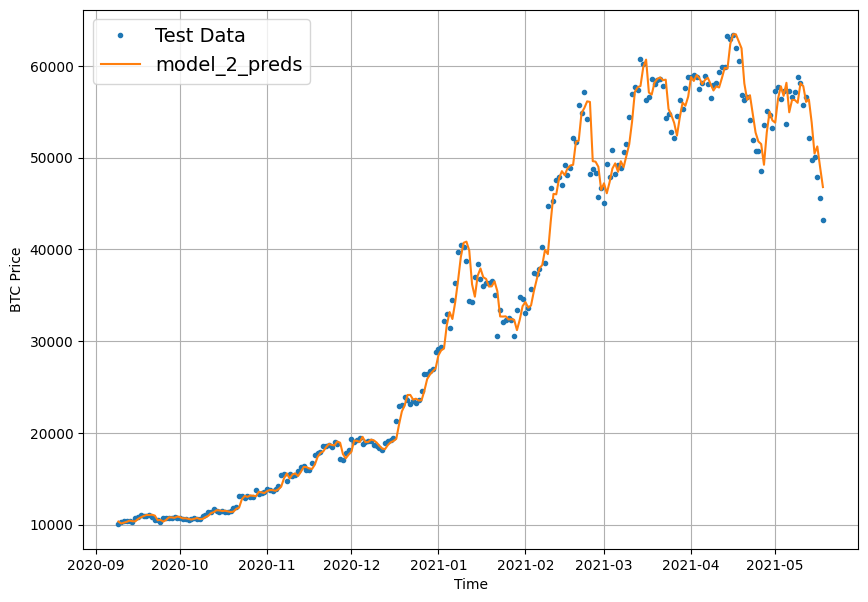

In [50]:
# Plot our function
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_2_preds , start = offset , format = "-" , label = "model_2_preds")

# Model 3 dense : Same as model 2 but , Window size = 30 , Horizon = 7

In [51]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
HORIZON = 7
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [52]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [53]:
# Model 3 : Same as with model 1 but window size = 30 and horizon = 7
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_3_dense"
)
# Compile a model

model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_3 = model_3.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2133.2991 - mae: 2133.2991 

18/18 [==============================] - 3s 79ms/step - loss: 1688.4309 - mae: 1688.4309 - val_loss: 2779.7542 - val_mae: 2779.7542
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 531.5193 - mae: 531.5193

18/18 [==============================] - 1s 50ms/step - loss: 511.1776 - mae: 511.1776 - val_loss: 2373.9529 - val_mae: 2373.9529
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 391.6175 - mae: 391.6175

18/18 [==============================] - 1s 30ms/step - loss: 392.9307 - mae: 392.9307 - val_loss: 2042.2906 - val_mae: 2042.2906
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 412.4249 - mae: 412.4249

18/18 [==============================] - 1s 30ms/step - loss: 349.0615 - mae: 349.0615 - val_loss: 1813.1971 - val_mae: 1813.1971
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 321.5587 - mae: 321.5587 - val_loss: 1930.0732 - val_mae: 1930.0732
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 307.6931 - mae: 307.6931

18/18 [==============================] - 1s 30ms/step - loss: 306.7015 - mae: 306.7015 - val_loss: 1606.9399 - val_mae: 1606.9399
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 294.0649 - mae: 294.0649 - val_loss: 1625.5076 - val_mae: 1625.5076
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 288.8958 - mae: 288.8958

18/18 [==============================] - 1s 32ms/step - loss: 288.8958 - mae: 288.8958 - val_loss: 1552.5002 - val_mae: 1552.5002
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 282.0843 - mae: 282.0843 - val_loss: 1757.9125 - val_mae: 1757.9125
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 240.2971 - mae: 240.2971

18/18 [==============================] - 1s 30ms/step - loss: 293.0674 - mae: 293.0674 - val_loss: 1526.9664 - val_mae: 1526.9664
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 275.6516 - mae: 275.6516

18/18 [==============================] - 1s 30ms/step - loss: 276.9425 - mae: 276.9425 - val_loss: 1470.9176 - val_mae: 1470.9176
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 270.9061 - mae: 270.9061 - val_loss: 1632.2535 - val_mae: 1632.2535
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 267.6330 - mae: 267.6330 - val_loss: 1473.2340 - val_mae: 1473.2340
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 266.0763 - mae: 266.0763

18/18 [==============================] - 1s 32ms/step - loss: 266.0763 - mae: 266.0763 - val_loss: 1455.2786 - val_mae: 1455.2786
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 265.0052 - mae: 265.0052 - val_loss: 1634.4351 - val_mae: 1634.4351
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 263.4560 - mae: 263.4560 - val_loss: 1466.5570 - val_mae: 1466.5570
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 261.2149 - mae: 261.2149 - val_loss: 1557.8313 - val_mae: 1557.8313
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 263.1852 - mae: 263.1852 - val_loss: 1581.5059 - val_mae: 1581.5059
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 258.4955 - mae: 258.4955 - val_loss: 1602.5530 - val_mae: 1602.5530
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 263.5529 - mae: 263.5529

18/18 [==============================] - 1s 43ms/step - loss: 262.8409 - mae: 262.8409 - val_loss: 1408.0299 - val_mae: 1408.0299
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 251.6239 - mae: 251.6239 - val_loss: 1453.2024 - val_mae: 1453.2024
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 252.4506 - mae: 252.4506 - val_loss: 1411.2841 - val_mae: 1411.2841
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 260.3261 - mae: 260.3261

18/18 [==============================] - 1s 58ms/step - loss: 256.0922 - mae: 256.0922 - val_loss: 1366.9227 - val_mae: 1366.9227
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 303.1042 - mae: 303.1042

18/18 [==============================] - 1s 31ms/step - loss: 267.0229 - mae: 267.0229 - val_loss: 1358.6476 - val_mae: 1358.6476
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 256.2523 - mae: 256.2523 - val_loss: 1636.1080 - val_mae: 1636.1080
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 254.7402 - mae: 254.7402 - val_loss: 1412.6687 - val_mae: 1412.6687
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 249.7511 - mae: 249.7511 - val_loss: 1420.2241 - val_mae: 1420.2241
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 246.1358 - mae: 246.1358 - val_loss: 1399.1747 - val_mae: 1399.1747
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 246.8292 - mae: 246.8292 - val_loss: 1455.0975 - val_mae: 1455.0975
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 245.3148 - mae: 245.3148 - val_loss: 1384.3838 - val_mae: 1384.3838
Epoch 31/100
14/18

18/18 [==============================] - 1s 32ms/step - loss: 242.7666 - mae: 242.7666 - val_loss: 1352.8890 - val_mae: 1352.8890
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 235.3900 - mae: 235.3900

18/18 [==============================] - 1s 31ms/step - loss: 242.4723 - mae: 242.4723 - val_loss: 1327.6549 - val_mae: 1327.6549
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 243.1167 - mae: 243.1167 - val_loss: 1370.0759 - val_mae: 1370.0759
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 245.4393 - mae: 245.4393 - val_loss: 1329.0537 - val_mae: 1329.0537
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 242.3220 - mae: 242.3220 - val_loss: 1379.4324 - val_mae: 1379.4324
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 243.8357 - mae: 243.8357 - val_loss: 1383.0463 - val_mae: 1383.0463
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 259.5636 - mae: 259.5636 - val_loss: 1426.3618 - val_mae: 1426.3618
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 241.3824 - mae: 241.3824 - val_loss: 1400.9977 - val_mae: 1400.9977
Epoch 39/100
18/18

18/18 [==============================] - 1s 30ms/step - loss: 236.8724 - mae: 236.8724 - val_loss: 1302.2415 - val_mae: 1302.2415
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 243.0822 - mae: 243.0822 - val_loss: 1339.6720 - val_mae: 1339.6720
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 237.3753 - mae: 237.3753 - val_loss: 1470.7789 - val_mae: 1470.7789
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 243.2698 - mae: 243.2698 - val_loss: 1324.2430 - val_mae: 1324.2430
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 239.1561 - mae: 239.1561 - val_loss: 1441.7228 - val_mae: 1441.7228
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 242.9324 - mae: 242.9324 - val_loss: 1357.3961 - val_mae: 1357.3961
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 255.4803 - mae: 255.4803 - val_loss: 1518.1874 - val_mae: 1518.1874
Epoch 50/100
18/18

18/18 [==============================] - 1s 30ms/step - loss: 233.5313 - mae: 233.5313 - val_loss: 1289.6616 - val_mae: 1289.6616
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 236.2026 - mae: 236.2026 - val_loss: 1294.7670 - val_mae: 1294.7670
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 235.1817 - mae: 235.1817 - val_loss: 1289.9547 - val_mae: 1289.9547
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 235.5992 - mae: 235.5992 - val_loss: 1312.6628 - val_mae: 1312.6628
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 235.1211 - mae: 235.1211 - val_loss: 1339.0282 - val_mae: 1339.0282
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 235.2241 - mae: 235.2241 - val_loss: 1290.5789 - val_mae: 1290.5789
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 189.0761 - mae: 189.0761

18/18 [==============================] - 1s 30ms/step - loss: 234.9409 - mae: 234.9409 - val_loss: 1283.7775 - val_mae: 1283.7775
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 216.5907 - mae: 216.5907

18/18 [==============================] - 1s 30ms/step - loss: 232.9130 - mae: 232.9130 - val_loss: 1282.9775 - val_mae: 1282.9775
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 232.0781 - mae: 232.0781 - val_loss: 1369.5616 - val_mae: 1369.5616
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 231.6603 - mae: 231.6603 - val_loss: 1300.3077 - val_mae: 1300.3077
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 236.5619 - mae: 236.5619 - val_loss: 1342.9913 - val_mae: 1342.9913
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 256.8143 - mae: 256.8143

18/18 [==============================] - 1s 30ms/step - loss: 229.1130 - mae: 229.1130 - val_loss: 1273.1036 - val_mae: 1273.1036
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 232.4385 - mae: 232.4385 - val_loss: 1309.9686 - val_mae: 1309.9686
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 231.9258 - mae: 231.9258 - val_loss: 1554.0846 - val_mae: 1554.0846
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 241.5534 - mae: 241.5534 - val_loss: 1286.7849 - val_mae: 1286.7849
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 234.9822 - mae: 234.9822 - val_loss: 1274.8053 - val_mae: 1274.8053
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 228.5231 - mae: 228.5231 - val_loss: 1547.2057 - val_mae: 1547.2057
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 233.0058 - mae: 233.0058 - val_loss: 1325.4821 - val_mae: 1325.4821
Epoch 71/100
 1/18

18/18 [==============================] - 1s 30ms/step - loss: 230.3536 - mae: 230.3536 - val_loss: 1269.5568 - val_mae: 1269.5568
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 232.7676 - mae: 232.7676 - val_loss: 1288.2676 - val_mae: 1288.2676
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 230.0063 - mae: 230.0063 - val_loss: 1299.8331 - val_mae: 1299.8331
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 227.6842 - mae: 227.6842 - val_loss: 1319.5962 - val_mae: 1319.5962
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 228.5906 - mae: 228.5906 - val_loss: 1430.0923 - val_mae: 1430.0923
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 189.9275 - mae: 189.9275

18/18 [==============================] - 1s 31ms/step - loss: 231.8165 - mae: 231.8165 - val_loss: 1259.9939 - val_mae: 1259.9939
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 229.3393 - mae: 229.3393 - val_loss: 1261.2921 - val_mae: 1261.2921
Epoch 78/100
14/18 [======================>.......] - ETA: 0s - loss: 235.2610 - mae: 235.2610

18/18 [==============================] - 1s 43ms/step - loss: 232.1756 - mae: 232.1756 - val_loss: 1259.4705 - val_mae: 1259.4705
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 232.3531 - mae: 232.3531 - val_loss: 1317.6860 - val_mae: 1317.6860
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 228.4657 - mae: 228.4657 - val_loss: 1307.4103 - val_mae: 1307.4103
Epoch 81/100
12/18 [===================>..........] - ETA: 0s - loss: 233.7800 - mae: 233.7800

18/18 [==============================] - 1s 44ms/step - loss: 226.5661 - mae: 226.5661 - val_loss: 1236.8030 - val_mae: 1236.8030
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 226.2445 - mae: 226.2445 - val_loss: 1270.0338 - val_mae: 1270.0338
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 225.4501 - mae: 225.4501 - val_loss: 1289.4896 - val_mae: 1289.4896
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 226.8996 - mae: 226.8996 - val_loss: 1237.4167 - val_mae: 1237.4167
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 226.7818 - mae: 226.7818 - val_loss: 1256.9673 - val_mae: 1256.9673
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 228.0357 - mae: 228.0357 - val_loss: 1318.9249 - val_mae: 1318.9249
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 238.1503 - mae: 238.1503 - val_loss: 1365.3372 - val_mae: 1365.3372
Epoch 88/100
18/18

18/18 [==============================] - 1s 30ms/step - loss: 227.0301 - mae: 227.0301 - val_loss: 1225.8021 - val_mae: 1225.8021
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 227.2465 - mae: 227.2465 - val_loss: 1390.1726 - val_mae: 1390.1726
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 229.9563 - mae: 229.9563 - val_loss: 1345.0050 - val_mae: 1345.0050
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 227.8767 - mae: 227.8767 - val_loss: 1276.0778 - val_mae: 1276.0778
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 232.5310 - mae: 232.5310 - val_loss: 1401.3534 - val_mae: 1401.3534
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 234.2934 - mae: 234.2934 - val_loss: 1354.3884 - val_mae: 1354.3884
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 225.8442 - mae: 225.8442 - val_loss: 1255.3999 - val_mae: 1255.3999
Epoch 99/100
18/18

In [54]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1225.8021 - mae: 1225.8021


[1225.8021240234375, 1225.8021240234375]

In [55]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 1ms/step


In [56]:
test_labels.shape , model_3_preds.shape

((551, 7), (551, 7))

In [57]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([ 652.63055 ,  487.74887 ,  414.89328 ,  522.7044  ,  476.96793 ,
         556.24115 ,  586.7789  ,  515.51764 ,  606.3254  ,  636.3429  ,
         817.8742  ,  839.661   ,  856.7543  ,  848.8717  ,  611.5034  ,
         230.91629 ,  122.94489 ,  208.20619 ,  204.75809 ,  270.44672 ,
         231.90541 ,  241.98982 ,  343.23227 ,  288.53558 ,  246.45166 ,
         141.32066 ,  164.19182 ,  231.58022 ,  181.33775 ,  226.55078 ,
         296.3475  ,  381.87576 ,  326.8222  ,  373.00766 ,  328.16107 ,
         348.26193 ,  347.49918 ,  298.09738 ,  232.8639  ,  152.61697 ,
         402.44608 ,   87.69957 ,  110.98417 ,   98.353165,  139.62039 ,
          70.90758 ,   88.27853 ,  123.87667 ,  132.25732 ,  169.4571  ,
         172.31068 ,  150.82443 ,  214.3014  ,  147.84543 ,  188.32352 ,
         299.20514 ,  495.23355 ,  490.31174 ,  449.70697 ,  521.2032  ,
         325.85477 ,  225.52498 ,  222.9218  ,  317.90073 ,  420.93387 ,
         453.1224  ,  456.41238 ,  544.80457

# Make our evaluation function work for larger horizons

In [58]:
model_2_results["mae"].ndim

0

In [59]:
model_3_results["mae"].ndim

1

In [60]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1225.8021 - mae: 1225.8021


[1225.8021240234375, 1225.8021240234375]

In [61]:
tf.reduce_mean(model_3_results["mae"]).numpy()  # Burda tensorflowun model loss u verirken yaptıgını yaptık aslında tek bir deger aldık outputumuza bu yüzden modelin mae evaluate iyle aynı çıktı

1225.8021

In [62]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)   # Eğerki dimensionu 1 ve 1 den büyükse bizim outputumuzun mean alıyoruz değerlerde tek bir değer elde etmek icin.

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }


In [63]:
model_3_results = evaluate_preds( y_true = test_labels , y_pred = model_3_preds)
model_3_results

{'mae': 1225.8021,
 'mse': 5308033.0,
 'rmse': 1413.5251,
 'mape': 5.57866,
 'mase': 2.1812463}

# Hava tahmini yaparken gibi düşün. İlk cama çıkıp havaya baktıgında hava kapalıysa 1 saat içinde yağmur yağacağını tahmin edersin ve bunun doğruluğu çok yüksektir. Fakat cama çıkıp havaya bakıp önümüzdeki 5. günü tahmin ettiğinde %90 yanlış çıkacaktır. Horizon belirlerken bunu düşünebilirsin.

In [64]:
test_labels.shape

(551, 7)

In [65]:
mod = tf.reduce_mean(model_3_preds , axis = 1)
mod

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 9445.846 ,  9200.773 ,  9046.003 ,  9149.299 ,  9031.315 ,
        9018.817 ,  8952.972 ,  8732.536 ,  8618.59  ,  8486.792 ,
        8477.749 ,  8357.544 ,  8208.822 ,  8148.357 ,  7879.199 ,
        7555.399 ,  7425.393 ,  7228.4956,  7249.9106,  7229.7275,
        7464.068 ,  7528.978 ,  7723.426 ,  7672.434 ,  7654.3896,
        7516.057 ,  7413.3716,  7393.0938,  7405.3086,  7457.7515,
        7541.085 ,  7581.8516,  7462.5693,  7404.013 ,  7399.829 ,
        7385.1094,  7401.6133,  7380.684 ,  7275.534 ,  7116.527 ,
        6831.3594,  7188.052 ,  7225.7397,  7243.903 ,  7364.5   ,
        7304.8506,  7311.102 ,  7347.2256,  7304.902 ,  7307.4424,
        7306.598 ,  7311.539 ,  7433.981 ,  7392.997 ,  7289.841 ,
        7307.0234,  7162.776 ,  7281.445 ,  7438.7275,  7471.0156,
        7723.9497,  7933.117 ,  8159.6147,  8071.4487,  8087.7837,
        8178.577 ,  8245.125 ,  8233.265 ,  8619.625 ,  8872.864 ,
        8899.1

In [66]:
model_3_preds.shape

(551, 7)

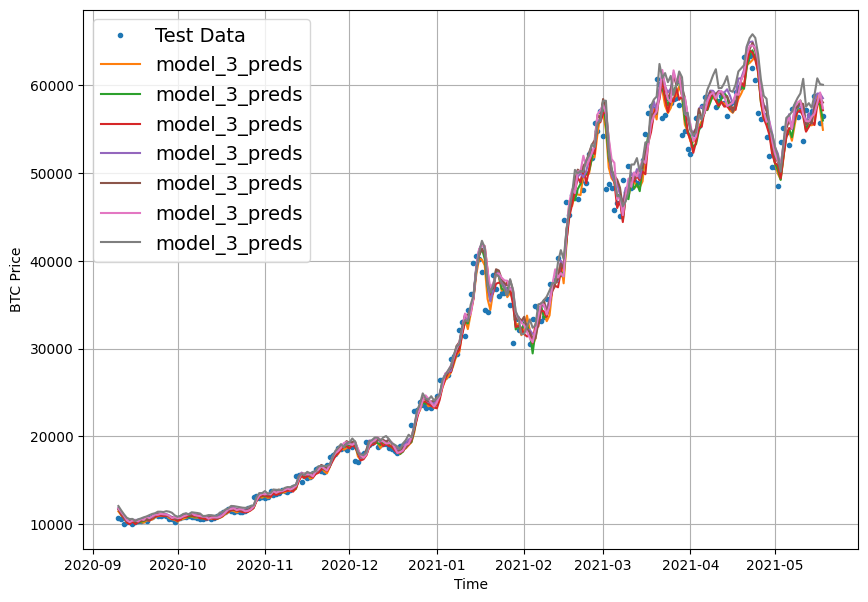

In [67]:
# Plot our function
# Plot ederken direkt x_test kullanmamamızın sebebi x_test datamız bütün tarihleri içeriyor daha train test diye ayrılmamış bir data. Bu yüzden biz test kısmını almak için test_windowsun lenghtini alıp ordan baslatıyoruz plot etmeye.
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_3_preds , start = offset , format = "-" , label = "model_3_preds")
# test_labels[ : , 0]   burda aslında her rowun 0. columnunu alıyoruz yani 7 tane prediction yaptıgımız horizonların hepsinin sadece 1. predictionunu alıyoruz.

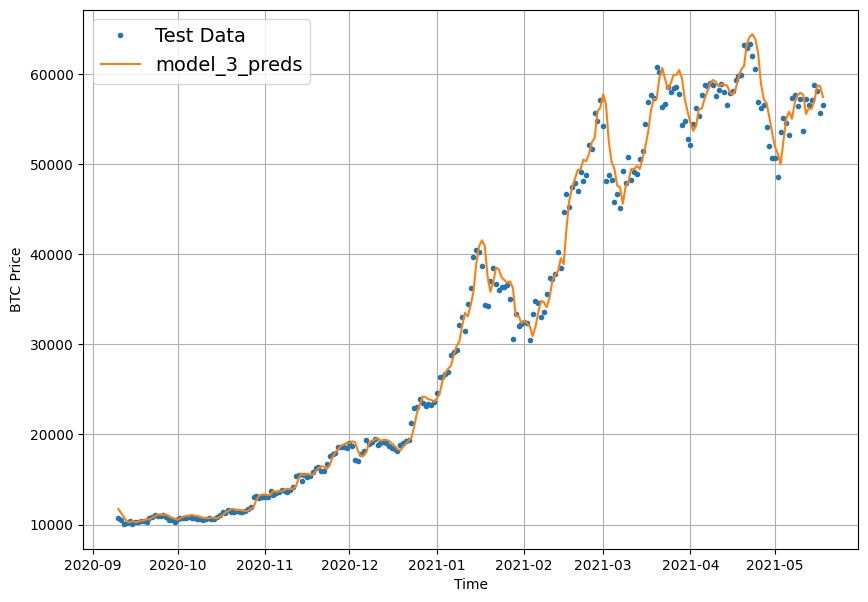

In [68]:
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = tf.reduce_mean(model_3_preds , axis = 1) , start = offset , format = "-" , label = "model_3_preds")
# Burda da aslında bütün 7 elementlik forecastlarımızın(horizon) tek tek average ını aldık. Yani aslında burda tam doğru değerleri görmüyoruz ama bize bit hint veriyor.

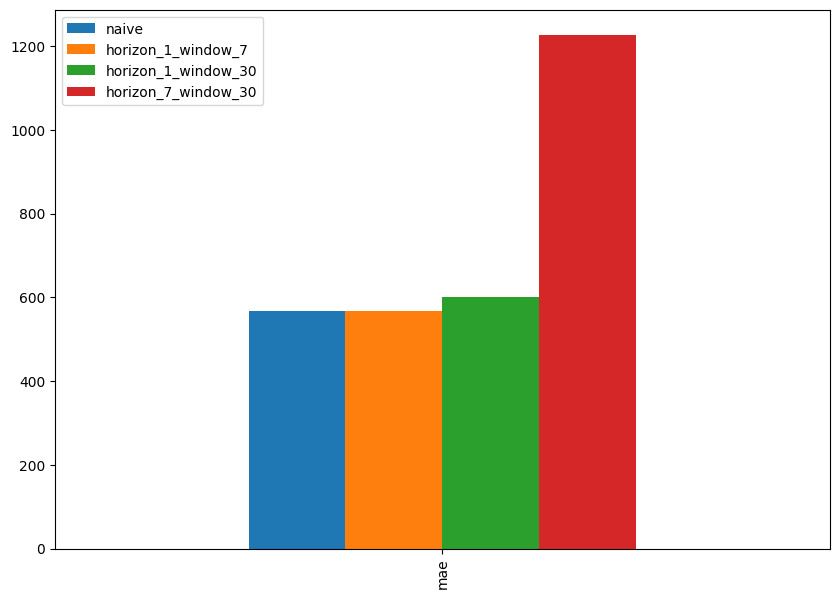

In [69]:
pd.DataFrame({
    "naive": naive_results["mae"] ,
    "horizon_1_window_7": model_1_results["mae"] ,
    "horizon_1_window_30": model_2_results["mae"] ,
    "horizon_7_window_30": model_3_results["mae"]
}  , index = ["mae"]
             ).plot(figsize = (10 , 7) , kind = "bar");

# Autocorrelation forecast incele

## You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestap) is typically close to the value at t (the current timestep). In other words , today's value is probably pretty close to yesterday's value. Of course, This isnt always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly) , a naive model will often get fairly good results. resource: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [70]:
HORIZON = 1 # We will predict 1 number
WINDOW_SIZE = 7 # We will use 7 elements for training

In [71]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)


(2780, 2780)

In [72]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows ,full_labels )
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# To use the Conv1D layer , we need an input shape of : (batch_size , timesteps , input_dim).

However our data isnt in that shape yet.

In [73]:
# Check data input shape
train_windows[0].shape  # (WINDOW_SIZE , )

(7,)

In [74]:
# Before we pass our data to the Conv1D layer , we have to reshape it in order to make sure it works.
example = tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [75]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)) # Add extra dimension for input_dim
# lambda x: tf.expand_dims(x, axis=1): Bu Lambda katmanı bir işlevi tanımlar. İşlev, bir giriş tensörünü (x) alır ve bu tensörü işler. İşlev, giriş tensörünü bir boyut eklemek için tf.expand_dims fonksiyonunu kullanır. Bu işlev, giriş tensörünün her bir öğesini (örneğin bir veri noktasını) işler ve bu öğelerin her birini önceki boyutları koruyarak belirtilen eksen (axis=1) boyunca yeni bir boyut ekler.
# layers.Lambda: Bu, Keras'ın katmanlarını tanımlamak için kullanılan bir sınıftır. Lambda katmanı, özel bir işlevi (fonksiyonu) uygulamak için kullanılır. Bu işlev, katmanın giriş verilerini dönüştürmek veya manipüle etmek için kullanılır.

# Direkt tf.expand_dims kullanmayıp lambda layer kullanmamızın sebebi lambda layerı modelimize direkt ekleyebilecek olmamız

In [76]:
# Test out our lambda layer
print(f"Original shape : {example.shape} ")  # ( WINDOW_SIZE , )
print(f"Expanded shape : { expand_dims_layer(example).shape }")  # ( WINDOW_SIZE , input_dim )

Original shape : (7,) 
Expanded shape : (7, 1)


### NOTE: kernel_size defines the size of the sliding window.

The filters parameters is just how many different windows you will have (All of them with the same length , which is kernel_size) . How many different results or channels you want to produce.

When you use filters = 100 and kernel_size = 4 , you are creating 100 different filters , each of them with length 4. The result will bring 100 different convolutions.

### NOTE: Conv1D katmanları, girdi sıralı verileri üzerinde kaydırma işlemleri gerçekleştirir ve bu verilerdeki özellikleri çıkarır. Ardışık Conv1D katmanlarını bir araya getirerek daha karmaşık özellikleri yakalayabilirsiniz. Ancak sıralı verilerde tipik olarak Conv1D katmanları arasına pooling katmanları eklemeye gerek yoktur, çünkü Conv1D katmanları zaten sıralı verilerdeki özellikleri öğrenmek için yeterince yeteneklidir.

In [77]:
# Create a model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential(
    [
        #expand_dims_layer ,  direkt bunu kullanabiliriz practice amaçlı baştan yazıcaz
        layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)) ,
        layers.Conv1D(filters = 128 , activation = "relu" , kernel_size = 5 , padding = "causal" ) , # kernel_size = 5 dedigimizde strides = 1 oldugu icin default olarak windowun icine girip ilk 5 ine bakıyor sonrasında ilk elementi atlayıp sonraki 5 ine bakıyor böyle devam ediyor.
        # padding = causal olmasının sebebi causal olunca "model shouldnt violate the temporal order " bizim datamızda da temporal bir yapı oldugu icin casual kullanıyoruz.
        layers.Dense(HORIZON)
    ]  , name = "model_4_conv1d"
)
# Compile a model
model_4.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_4.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2165.5056

18/18 [==============================] - 8s 57ms/step - loss: 2165.5056 - val_loss: 2959.7351
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 322.1458

18/18 [==============================] - 1s 41ms/step - loss: 322.1458 - val_loss: 1391.6807
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 216.8560

18/18 [==============================] - 1s 42ms/step - loss: 212.0678 - val_loss: 1016.0008
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 180.2888

18/18 [==============================] - 1s 41ms/step - loss: 180.2888 - val_loss: 966.9912
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 174.6957 - val_loss: 978.5674
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9025

18/18 [==============================] - 1s 41ms/step - loss: 171.0328 - val_loss: 958.1472
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 169.5771

18/18 [==============================] - 1s 40ms/step - loss: 169.5771 - val_loss: 934.0110
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 165.3120

18/18 [==============================] - 1s 41ms/step - loss: 165.5896 - val_loss: 920.5714
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 163.8073 - val_loss: 953.5469
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 156.8677

18/18 [==============================] - 1s 61ms/step - loss: 160.6726 - val_loss: 889.7198
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 162.8264

18/18 [==============================] - 1s 58ms/step - loss: 157.4557 - val_loss: 866.2710
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 155.1004 - val_loss: 926.2772
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 153.3997 - val_loss: 874.6448
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 163.6088

18/18 [==============================] - 1s 40ms/step - loss: 149.7858 - val_loss: 863.8087
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 148.0839

18/18 [==============================] - 1s 58ms/step - loss: 148.0839 - val_loss: 846.3277
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 144.0493

18/18 [==============================] - 1s 40ms/step - loss: 144.0493 - val_loss: 844.0245
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 143.5820

18/18 [==============================] - 1s 41ms/step - loss: 143.5820 - val_loss: 834.8226
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 143.3586

18/18 [==============================] - 1s 41ms/step - loss: 142.1264 - val_loss: 775.1414
Epoch 19/100
15/18 [========================>.....] - ETA: 0s - loss: 138.5381

18/18 [==============================] - 1s 42ms/step - loss: 138.8122 - val_loss: 749.7307
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 139.7655 - val_loss: 796.6030
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 136.3951

18/18 [==============================] - 1s 41ms/step - loss: 137.1970 - val_loss: 731.6558
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 135.9036

18/18 [==============================] - 1s 40ms/step - loss: 135.9036 - val_loss: 720.4283
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 129.3526

18/18 [==============================] - 1s 41ms/step - loss: 129.3526 - val_loss: 713.6938
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 129.5153

18/18 [==============================] - 1s 41ms/step - loss: 129.6973 - val_loss: 703.8089
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 127.9846

18/18 [==============================] - 1s 40ms/step - loss: 127.9846 - val_loss: 691.2823
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 128.0288 - val_loss: 723.1693
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 126.7290

18/18 [==============================] - 1s 39ms/step - loss: 126.7290 - val_loss: 675.3514
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 121.6139

18/18 [==============================] - 1s 42ms/step - loss: 122.0586 - val_loss: 670.9244
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 121.0810

18/18 [==============================] - 1s 53ms/step - loss: 121.0810 - val_loss: 670.0623
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 125.8136 - val_loss: 753.2974
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 133.3242 - val_loss: 853.3503
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 131.9808 - val_loss: 694.7843
Epoch 33/100
10/18 [===============>..............] - ETA: 0s - loss: 127.2369

18/18 [==============================] - 1s 76ms/step - loss: 124.0752 - val_loss: 668.4264
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 121.6619

18/18 [==============================] - 1s 39ms/step - loss: 121.2770 - val_loss: 643.2371
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 103.8492

18/18 [==============================] - 1s 39ms/step - loss: 118.5587 - val_loss: 639.1577
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2911 - val_loss: 684.0728
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 150.4745

18/18 [==============================] - 1s 39ms/step - loss: 120.3319 - val_loss: 625.8810
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 116.8470

18/18 [==============================] - 1s 74ms/step - loss: 116.5697 - val_loss: 621.7946
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3296 - val_loss: 637.5685
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3153 - val_loss: 625.4420
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9803 - val_loss: 650.2290
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 119.6821

18/18 [==============================] - 1s 73ms/step - loss: 119.6821 - val_loss: 614.6440
Epoch 43/100
18/18 [==============================] - 0s 8ms/step - loss: 114.2781 - val_loss: 616.7938
Epoch 44/100
10/18 [===============>..............] - ETA: 0s - loss: 111.1815

18/18 [==============================] - 1s 67ms/step - loss: 115.5174 - val_loss: 609.0975
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3624 - val_loss: 626.2145
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 88.9467

18/18 [==============================] - 1s 39ms/step - loss: 114.8235 - val_loss: 604.6810
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6077 - val_loss: 653.9386
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7838 - val_loss: 610.4336
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8984 - val_loss: 622.4620
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2280 - val_loss: 608.0966
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7027 - val_loss: 627.6403
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 121.0175

18/18 [==============================] - 1s 41ms/step - loss: 118.2973 - val_loss: 594.5261
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4475 - val_loss: 596.8156
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7114 - val_loss: 597.0183
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 113.8352

18/18 [==============================] - 1s 41ms/step - loss: 113.8352 - val_loss: 589.4979
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8576 - val_loss: 810.8166
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 140.1103 - val_loss: 604.4890
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 120.6564 - val_loss: 667.4457
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1640 - val_loss: 596.1252
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5311 - val_loss: 629.9380
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4520 - val_loss: 598.4741
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 110.4828 - val_loss: 597.7473
Epoch 63/100
12/18 [===================>..........] - ETA: 0s - loss: 114.2422

18/18 [==============================] - 1s 58ms/step - loss: 111.3529 - val_loss: 584.7678
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 110.7634 - val_loss: 637.6669
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 117.3760

18/18 [==============================] - 1s 57ms/step - loss: 114.9195 - val_loss: 582.2180
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7543 - val_loss: 587.1072
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0131 - val_loss: 609.6906
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7639 - val_loss: 722.8536
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 126.2704 - val_loss: 698.6674
Epoch 70/100
18/18 [==============================] - ETA: 0s - loss: 119.9111

18/18 [==============================] - 1s 61ms/step - loss: 119.9111 - val_loss: 578.6816
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1585 - val_loss: 592.9378
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 108.1538

18/18 [==============================] - 1s 40ms/step - loss: 109.7921 - val_loss: 577.7396
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6028 - val_loss: 599.7753
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0217 - val_loss: 585.9603
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8996 - val_loss: 604.5505
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 109.7924

18/18 [==============================] - 1s 40ms/step - loss: 109.9108 - val_loss: 574.1080
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1367 - val_loss: 576.6481
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0011 - val_loss: 574.2770
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0663 - val_loss: 587.5142
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2994 - val_loss: 594.0859
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5645 - val_loss: 581.1342
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 116.0641

18/18 [==============================] - 1s 40ms/step - loss: 116.0641 - val_loss: 571.5127
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6142 - val_loss: 637.2019
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9634 - val_loss: 590.0707
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0314 - val_loss: 572.3505
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8936 - val_loss: 601.9907
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6357 - val_loss: 572.9666
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1698 - val_loss: 590.2220
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3416 - val_loss: 583.9362
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2371 - val_loss: 625.4877
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 39ms/step - loss: 109.5630 - val_loss: 571.2095
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 108.9512

18/18 [==============================] - 1s 39ms/step - loss: 108.9512 - val_loss: 568.4544
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1177 - val_loss: 594.9694


In [78]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Evaluate our model
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 594.9695


594.969482421875

In [80]:
# Load back in the best performing Conv1D model and re-evaluate it
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.4546


568.45458984375

In [81]:
test_windows.shape , test_labels.shape

((556, 7), (556, 1))

In [82]:
model_4_preds = model_4.predict(test_windows)
test_labels.shape , tf.squeeze(model_4_preds).shape

18/18 [==============================] - 0s 2ms/step


((556, 1), TensorShape([556]))

In [83]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 568.4545,
 'mse': 1176567.9,
 'rmse': 1084.6971,
 'mape': 2.5369759,
 'mase': 0.9986172}

# Model 5: RNN (With LSTM)

We will use the same data we created previously.

In [84]:
tf.random.set_seed(42)
# Lets build a LSTM model with the Functional API
inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1))(inputs)  # Because LSTM layers should take input with shape : A 3D tensor with shape [batch, timesteps, feature].
#x = layers.LSTM(128 , return_sequences = True)(x)
x = layers.LSTM(128 , activation = "relu")(x)  # Default hyperparameterlarla modelimiz çok kötü mae verdi bu yüzden tuning yapacağız.
#x = layers.Dense(32 , activation = "relu")(x)  Bunlarla beraber denedik modelimiz yine improve olmadı
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs , outputs , name = "model_5_lstm")


In [85]:
# Compile a model
model_5.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_5.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 141ms/step - loss: 2334.3127 - val_loss: 8440.0781
Epoch 2/100
18/18 [==============================] - 2s 123ms/step - loss: 530.1069 - val_loss: 2088.2690
Epoch 3/100
18/18 [==============================] - 2s 103ms/step - loss: 239.6716 - val_loss: 1221.7887
Epoch 4/100
18/18 [==============================] - 2s 101ms/step - loss: 191.2233 - val_loss: 1083.3815
Epoch 5/100
18/18 [==============================] - 2s 101ms/step - loss: 183.6746 - val_loss: 1045.5179
Epoch 6/100
18/18 [==============================] - 2s 117ms/step - loss: 183.9635 - val_loss: 1017.5588
Epoch 7/100
18/18 [==============================] - 3s 155ms/step - loss: 184.5201 - val_loss: 1005.5398
Epoch 8/100
18/18 [==============================] - 2s 103ms/step - loss: 179.0986 - val_loss: 999.3205
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 177.7522 - val_loss: 999.8040
Epoch 10/100
18/18 [=============================

In [86]:
# Load in best version of model_5 and evaluate it
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 583.5103


583.5103149414062

In [87]:
model_5_preds = model_5.predict(test_windows)
model_5_preds.shape

18/18 [==============================] - 0s 2ms/step


(556, 1)

In [88]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_5_preds))
model_5_results

{'mae': 583.5103,
 'mse': 1229907.6,
 'rmse': 1109.012,
 'mape': 2.6172013,
 'mase': 1.025066}

### Because neural networks are such powerful algorihtms , they can be used for almost any problem , however , that doesnt mean they will achieve performant or usable results.

# Make a multivariate time series dataset

Before we add a feature to our time series data , what is a feature we can use?

Bizim şu anki datamız open system bir data yani bunun grafiğini her şey değiştirebilir. Bu yüzden biz buna dışarıdan her türlü feature ekleyebiliriz.

One feature we could add is whether or not Elong Trust tweeted on that day.
* day 1 - 0 (this number is  how many tweeted on this day)
* day 2 - 1
* day 3 - 0

What is a better feature to use?

How about the bitcoin halving events?(miningte kazdıgın her blok icin verilen bitcoin ödülünü yarıya düşürme eventi)(daha az , daha değerli olduğu için bu event olduktan sonra bitcoinin değeri artıyor.)

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [89]:
# Lets make a multivariate time series
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [90]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [91]:
# Lets add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward wont be in our dataset (our dataset starts from 01 October 2013 )
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates (we should add these values as our data's dates type like 2013-10-04)
block_reward_2_datetime = np.datetime64("2012-11-28")  # Sondaki 64 dtype ı belirtiyor.
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

# Bizim bi range oluşturmamız gerek bu tarihlerle. mesela block_reward_2_datetime ile block_reward_3_datetime arasındaki tarihlerde rewardımız 25 olacak. Kalanları da aynı bu şekilde ayarlayacağız.

In [92]:
 bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [93]:
 bitcoin_prices.index[ -1 : ]

DatetimeIndex(['2021-05-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [94]:
# Create date ranges of where spesific block_reward values should be
block_reward_2_days =  (block_reward_3_datetime - bitcoin_prices.index[0]).days # Because we set up our block_reward_2_datetime object as np.datetime , we can use this with the indexes on our Bitcoin prices DataFrame. bitcoin_prices.index[0] bizim datamızdaki ilk tarihi verecek. Datamızdaki ilk tarihten itibaren alıyoruz çünkü bizim datamızda 2012 verileri yok. İki datetime ı birbirinden çıakrdığımız için .days attribute kullanabiliyoruz.
block_reward_2_days

1012

In [95]:
block_reward_3_days = ( block_reward_4_datetime - bitcoin_prices.index[0] ).days
block_reward_2_days , block_reward_3_days
# ilk günden 1012. güne kadar  reward 25 , 1012. günden 2041. güne kadar reward 12 , 2421 den sonraki günler için reward 6.25 olacak

(1012, 2421)

In [96]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()  # bitcoin_prices dataframe imizin aynısını kopyaladık.
bitcoin_prices_block["block_reward"] = None    # block_reward columnu ekledik en başta boş olarak ekliyoruz sonrasında dolduruyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [97]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[ : block_reward_2_days , -1] = block_reward_2  # Index eklemek istediğimiz icin iloc kullanıyoruz. Son columnda block_rewardlarımız oldugu icin ve biz bunları doldurmak istedigimiz icin column kısmına -1 diyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [98]:
bitcoin_prices_block.iloc[ block_reward_2_days : block_reward_3_days , -1 ] = block_reward_3
bitcoin_prices_block.iloc[ block_reward_3_days :  , -1 ] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

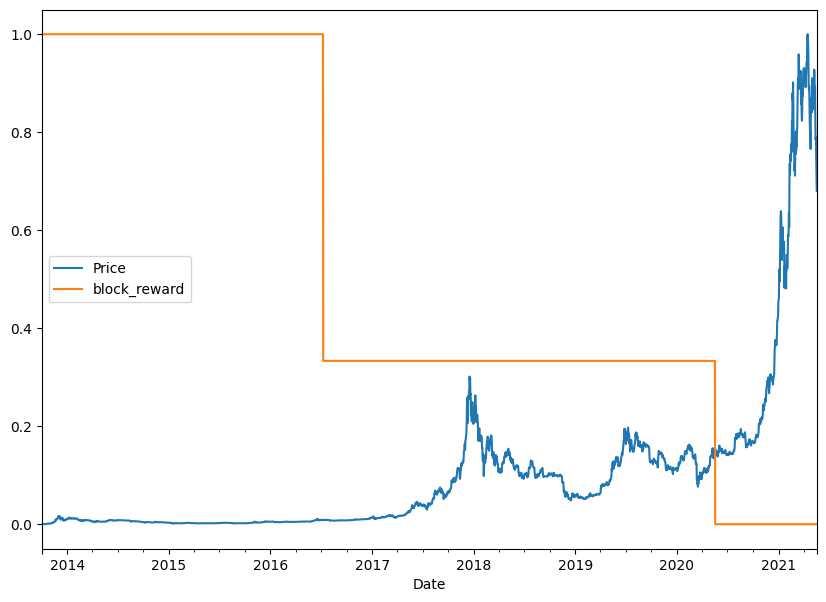

In [99]:
# Plot the block reward vs price over time.
# minmax_scale bütün değerleri 0 la 1 arasına sıkıştırıyor.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(
    minmax_scale( bitcoin_prices_block[ [ "Price" , "block_reward" ] ] ) ,
    columns = bitcoin_prices_block.columns ,
    index = bitcoin_prices_block.index
    )

scaled_price_block_df.plot(figsize = (10 , 7))

# Making a windowed dataset with pandas

Previously , we have turned our univariate time series into windowed dataset using the helper function above.

However , since we have got multivariate data , these functions wont work.

Not to worry , we can use pandas.DataFrame.shift() method to window our multivariate data.

In [100]:
# Setup dataset parameters
HORIZON = 1
WINDOW_SIZE = 7

In [101]:
# Make a copy of the bitcoin historcal data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price + {i+1}"] = bitcoin_prices_windowed["Price"].shift( periods = i + 1 )

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is created a way to window our dataset directly from a pandas dataframe. Yani mesela 2013-10-08	bu tarihteki price+1 den başlayıp price+7 ye kadar olan valuelar bizim bildiğimiz windowumuz train için kullandığımız datamız yani üstteki modellerde nasıl yaptıysak onun aynısı. Price columndaki değer de bizim actual horizonumuz. Yani biz window label ayırma işini aslında pandas dataframe i ile yaptık yaptıgımız baska bir sey degil.

In [102]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price" , axis = 1).astype(np.float32)
# Bu işlem, "price" sütununu veri çerçevesinden kaldırır ve sonucunda "Price" sütunu olmayan yeni bir DataFrame döndürür. Bu nedenle, axis=1 kullanarak sütun bazlı bir işlem gerçekleştirilir. Eğer axis=0 olarak ayarlarsanız, satırlar üzerinde işlem yaparsınız ve belirlediğiniz satırı çıkarırsınız.
# .dropna ile DataFrame imizdeki içinde NAN olan rowların hepsini kaldırıyor.
# Price columnu ayırmamızın sebebi biz X ile windowlarımızı oluşturuyoruz. Price columnu bizim horizon değerlerimizi tutuyor.
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [103]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

# Make train/test sets using indexing

In [104]:
split_size = int(len(X) * 0.8)
X_train , y_train = X[ : split_size] , y[ : split_size]
X_test , y_test = X[ split_size: ] , y[ split_size : ]

len( X_train) , len(y_train)  , len(X_test) , len(y_test)

(2224, 2224, 556, 556)

In [105]:
y_train

Date
2013-10-08     123.032997
2013-10-09     124.049004
2013-10-10     125.961159
2013-10-11     125.279663
2013-10-12     125.927498
                 ...     
2019-11-05    9369.627930
2019-11-06    9326.599609
2019-11-07    9335.751953
2019-11-08    9226.485352
2019-11-09    8794.358398
Name: Price, Length: 2224, dtype: float32

In [106]:
X_train.shape , y_train.shape

((2224, 8), (2224,))

# Model 6 : Same as model 1 but with block_reward

In [107]:
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential(
    [
        layers.Dense(128 , activation = "relu") ,
        layers.Dense(HORIZON)
    ] , name = "model_6_multivariate"
)
# Compile a model
model_6.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                )

# Fit the model
model_6.fit(
    X_train ,
    y_train ,
    epochs = 100 ,
    validation_data = (X_test , y_test) ,
    batch_size = 128 ,
    callbacks = [create_model_checkpoint(model_name = model_6.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 2895.2195

18/18 [==============================] - 2s 38ms/step - loss: 1156.1221 - val_loss: 2822.1440
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 423.0720

18/18 [==============================] - 0s 28ms/step - loss: 317.6573 - val_loss: 1252.2654
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 159.4713

18/18 [==============================] - 1s 53ms/step - loss: 196.1381 - val_loss: 1059.1017
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 223.9086

18/18 [==============================] - 1s 31ms/step - loss: 183.4427 - val_loss: 970.5029
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 177.5433

18/18 [==============================] - 0s 29ms/step - loss: 173.5286 - val_loss: 945.3484
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 129.3216

18/18 [==============================] - 1s 30ms/step - loss: 171.0105 - val_loss: 914.7103
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 198.7429

18/18 [==============================] - 1s 29ms/step - loss: 160.3750 - val_loss: 889.2513
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6535

18/18 [==============================] - 1s 29ms/step - loss: 153.0950 - val_loss: 838.7967
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 130.9476

18/18 [==============================] - 1s 31ms/step - loss: 150.5527 - val_loss: 827.1571
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 143.6251

18/18 [==============================] - 1s 42ms/step - loss: 146.7215 - val_loss: 786.8750
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 139.8826

18/18 [==============================] - 1s 42ms/step - loss: 138.6851 - val_loss: 780.5897
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 134.7667 - val_loss: 796.7084
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 134.2547

18/18 [==============================] - 1s 42ms/step - loss: 135.2220 - val_loss: 779.5823
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 130.0639

18/18 [==============================] - 1s 31ms/step - loss: 129.3288 - val_loss: 743.9753
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 126.3623

18/18 [==============================] - 1s 30ms/step - loss: 130.4446 - val_loss: 697.7741
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 111.7814

18/18 [==============================] - 0s 29ms/step - loss: 123.1634 - val_loss: 689.1785
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 122.6563 - val_loss: 724.4090
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 140.1618

18/18 [==============================] - 0s 28ms/step - loss: 121.7462 - val_loss: 652.0291
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7440 - val_loss: 735.0326
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0213

18/18 [==============================] - 0s 28ms/step - loss: 118.6022 - val_loss: 637.5956
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5780

18/18 [==============================] - 0s 28ms/step - loss: 120.0619 - val_loss: 634.3094
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 119.2222 - val_loss: 671.8613
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 119.0162

18/18 [==============================] - 0s 28ms/step - loss: 119.5435 - val_loss: 620.9196
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 115.0773

18/18 [==============================] - 1s 30ms/step - loss: 115.0773 - val_loss: 617.6788
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1595

18/18 [==============================] - 0s 28ms/step - loss: 113.9358 - val_loss: 615.4148
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 107.6674

18/18 [==============================] - 0s 28ms/step - loss: 116.2500 - val_loss: 610.3068
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 158.8228

18/18 [==============================] - 1s 52ms/step - loss: 116.7413 - val_loss: 607.0047
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 103.3951

18/18 [==============================] - 1s 29ms/step - loss: 112.5952 - val_loss: 604.4174
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1309 - val_loss: 622.8041
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 126.4612

18/18 [==============================] - 0s 29ms/step - loss: 117.9244 - val_loss: 602.1317
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 116.5652 - val_loss: 678.0928
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7230 - val_loss: 608.4938
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6316 - val_loss: 633.1457
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 111.1345 - val_loss: 624.8255
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 109.3908

18/18 [==============================] - 1s 29ms/step - loss: 111.4514 - val_loss: 601.1996
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 151.2977

18/18 [==============================] - 1s 30ms/step - loss: 117.7285 - val_loss: 588.6772
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0325 - val_loss: 596.4421
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2227 - val_loss: 597.4674
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 123.7343

18/18 [==============================] - 1s 30ms/step - loss: 111.1359 - val_loss: 588.5884
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3010 - val_loss: 631.1642
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8022

18/18 [==============================] - 1s 31ms/step - loss: 110.4492 - val_loss: 586.4542
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3847 - val_loss: 667.1404
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 117.2177 - val_loss: 647.3233
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 120.6491 - val_loss: 617.9476
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 108.1946

18/18 [==============================] - 1s 41ms/step - loss: 109.0835 - val_loss: 581.1050
Epoch 46/100
15/18 [========================>.....] - ETA: 0s - loss: 112.9491

18/18 [==============================] - 1s 43ms/step - loss: 110.1603 - val_loss: 580.1541
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 109.9416 - val_loss: 621.7054
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7632 - val_loss: 593.1606
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4574 - val_loss: 623.3117
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6097 - val_loss: 586.6573
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5672 - val_loss: 582.9016
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2214 - val_loss: 581.9340
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7474 - val_loss: 615.1940
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 102.5711

18/18 [==============================] - 1s 31ms/step - loss: 111.6474 - val_loss: 578.5966
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 125.6870

18/18 [==============================] - 1s 31ms/step - loss: 108.8848 - val_loss: 575.0137
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1919 - val_loss: 777.9952
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 120.8636 - val_loss: 626.1605
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7087 - val_loss: 625.9398
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2602 - val_loss: 616.0115
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5036 - val_loss: 642.1328
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 140.8078

18/18 [==============================] - 1s 29ms/step - loss: 109.2868 - val_loss: 573.0004
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9028 - val_loss: 581.0438
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3612 - val_loss: 691.5687
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9822 - val_loss: 582.9744
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 129.8995

18/18 [==============================] - 1s 30ms/step - loss: 108.8906 - val_loss: 572.2014
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9533 - val_loss: 572.3179
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1258 - val_loss: 651.0530
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7766 - val_loss: 577.7090
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3612 - val_loss: 743.9109
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 123.4137 - val_loss: 648.2474
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7497 - val_loss: 590.0905
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6225 - val_loss: 578.1552
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7917 - val_loss: 643.5861
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 174.92

18/18 [==============================] - 0s 28ms/step - loss: 106.4463 - val_loss: 569.5919
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0872 - val_loss: 575.4222
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6693 - val_loss: 571.0554
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 106.4203 - val_loss: 570.1879
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5114 - val_loss: 592.7460
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4394 - val_loss: 581.8945
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 106.7656 - val_loss: 574.3291
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2888 - val_loss: 571.8325
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3916 - val_loss: 574.6292
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 11

18/18 [==============================] - 0s 29ms/step - loss: 110.6372 - val_loss: 568.9868
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1120 - val_loss: 631.6317
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4069 - val_loss: 574.2773
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 130.4601

18/18 [==============================] - 0s 28ms/step - loss: 105.4285 - val_loss: 567.7626
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4339 - val_loss: 589.8932
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5872 - val_loss: 580.5170
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3690 - val_loss: 578.6815
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8986 - val_loss: 568.1556
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5382 - val_loss: 572.0906


In [108]:
# Load the best performing model_6
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_multivariate/")
model_6.evaluate(X_test , y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.7626


567.7625732421875

In [109]:
# Make predictions
model_6_preds = model_6.predict(X_test)
model_6_preds.shape


18/18 [==============================] - 0s 1ms/step


(556, 1)

In [110]:
y_test.shape

(556,)

In [111]:
model_6_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_6_preds)
)
model_6_results

{'mae': 567.7626,
 'mse': 1162583.8,
 'rmse': 1078.2318,
 'mape': 2.5661826,
 'mase': 0.9974016}

# Model 7 : N-BEATS Algorithm
Lets now try to build the biggest baddest ( though maybe not the baddest , as in , it performly very well ) time series forecasting model we have built so far.

More spesifically , we are going to replicating the algorithm in figure 1 from the paper : https://arxiv.org/pdf/1905.10437.pdf

* We will see how to use tensorflow layer subclassing ( to make our own custom layers.)
* Get experience using the functional API to create a custom architecture.
* Potentially get state of the art results on our problem.

### Building and testing the NBEATS block layer

Because the NBEATS block layer doesnt exist in tensorflow , we have got to create this.

To create custom layers and models in tensorflow , we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

Note : Fully connected layers means Dense layers.


In [112]:
# Create NBeatBlock custom layer. We are using subclassing because to create a layer in a network doesnt already exist in tensorflow.
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self ,
               input_size : int ,
               theta_size : int ,
               horizon : int ,
               n_neurons : int ,
               n_layers : int ,
               **kwargs   # the **kwargs argument takes care of all the arguments for the parent class (e.g. input_shape , trainable , name )(bütün default valueları biz girmemiş olsak bile **kwargs ile onları da default olarak eklemiş oluyoruz.)
               ):
    super().__init__(**kwargs)
    self.input_size = input_size   # If you want to initialize some variables in class , you should use self.variable_name = something.
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons , activation = "relu") for _ in range(n_layers)]  # We will put 4 for n_layers later.

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size , activation = "linear" , name = "theta")

    # Now we will describe our data how to go from the inputs to outputs with call method. (call method layer olustururken her zaman zorunlu)
  def call(self , inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)   # x will get updated contiunally as it passes through each layer in the fully connected stack.
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast , forecast = theta[ : , : self.input_size ] , theta[ : , -self.horizon : ]
    return backcast , forecast    # It is trying to use the backcast to improve its forecast positions.
    # backcast, theta'nın başlangıcından input_size boyutuna kadar olan bölümünü temsil eder. Bu, geçmiş zaman adımlarına ilişkin tahminlemeyi içerir.
    # forecast, theta'nın sonundan -horizon boyutuna kadar olan bölümünü temsil eder. Bu, gelecekteki zaman adımlarına ilişkin tahminlemeyi içerir.





Lets test our NBeatsBlock class

To do , we will make some dummy inputs and outputs



In [113]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(
    input_size = WINDOW_SIZE ,
    theta_size = WINDOW_SIZE + HORIZON , # Because our theta includes backcast and forecast , backcast acts like our input and forecast acts like our output, so we should use WINDOW_SIZE + HORIZON
    horizon = HORIZON ,
    n_neurons = 128 ,
    n_layers = 4
)

In [114]:
# Create a dummy inputs (have to be same shape with input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1,  axis = 0)  #  Dense layers should have (batch_size , input_dim) shape , so it would be 2D input with shape  (batch_size , input_dim)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [115]:
# Pass dummy inputs to dummy NBeatsBlock
backcast , forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they will be random due to no training of the model)
print(f"Backcast : {tf.squeeze(backcast.numpy())}")
print(f"Forecast : {tf.squeeze(forecast.numpy())}")

Backcast : [ 0.422305    0.04090414 -0.27895856  0.3010619   0.05484697 -0.26752898
  0.6331709 ]
Forecast : -0.7343583703041077


### Preparing data for the N-BEATS algorithm using 'tf.data' for faster training.

In [116]:
HORIZON = 1
WINDOW_SIZE = 7

In [117]:
# Create N-BEATS data inputs ( N-BEATS works with univariate time series )
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [118]:
# Add windowed column
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)

bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [119]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [120]:
# Time to make our dataset performant using tf.data
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset ,train_labels_dataset ))
test_dataset = tf.data.Dataset.zip((test_features_dataset ,test_labels_dataset ))

In [121]:
train_dataset = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters , we will tune our parameters using our paper , Table 18

We are using N-BEATS G(generic) algorithm and also we are going to use Daily forecast (Dly)

In [122]:
# Values from N-BEATS papers.
N_EPOCHS = 5000 # In paper , they say iterations for epochs.
N_NEURONS = 512 # In paper , they say Width
N_LAYERS = 4 # Our block network has 4 fully connected layers.
N_STACKS = 30 # Our algorihtm needs 30 stacks (written in paper)

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE , THETA_SIZE

(7, 8)

 Bizim modelimiz çok deep oldugunda (yani cok fazla hidden layer icerdiginde) output layera yaklasırken artık weightsler aşırı küçük oluyor ve bunlar küçük değerlerinden dolayı kaybolabiliyor(artık modelimiz untrainable hale geliyor bu sebepten dolayı). Biz bunu istemiyoruz. Bu yüzden residual neural network kullanıyoruz. Bu bize eğerki weightslerimiz çok küçüldüyse ve kaybolacaksa son hidden layerları atlayıp direkt output layera gelmesini sağlıyor.

## Getting ready for residual connections

Before we can craft our N-BEAST model , we need two layers for the residual connections(add and subtract)

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 in paper)

https://paperswithcode.com/method/resnet

In [123]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)
tensor_1 , tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [124]:
# Subtract
subtracted = tf.keras.layers.subtract( [ tensor_1 , tensor_2 ] )

# Add
added = tf.keras.layers.add( [ tensor_1 , tensor_2 ] )

subtracted.numpy() , added.numpy()

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32))

### Building , compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS Block layer using ' NBeatsBlock' (this will be the initial block used for the network , the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack ( we will be using the keras functional API)
3. Make the initial backcast and forecasts for the model with the layer created in step 1
4. Use for loop to create stacks of block layers
5. Use the ' NBeatsBlock ' class within the for loop in step 4 to create blocks which return backcasts and block level forecasts.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together with tf.keras.Model().
8. Compile the model with MAE loss and Adam optimizer with default settings.
9. Fit the N-BEAST model for 5000 epochs and since it's fitting for so many epochs , we will use a couple of callbacks :  
  * Early Stopping - Because the model will be training for so long , we will stop it early if it stops improving.
  * Reduce Learning Rate on Plateau - If model stops improving , try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance).


In [125]:
%%time

tf.random.set_seed(42)

# Step 1: Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(
    input_size = INPUT_SIZE ,
    theta_size = THETA_SIZE ,
    horizon = HORIZON ,
    n_neurons = N_NEURONS ,
    n_layers = N_LAYERS ,
    name = "InitialBlock"
)

# Step 2 : Create an input layer to stacks
stack_input = tf.keras.layers.Input( shape = (INPUT_SIZE)  , name = "stack_input")

# Step 3 : Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals , forecast = nbeats_block_layer(stack_input)  # Residuals burda backcast döndürüyor.

# Step 4 : Create stacks of block layers.
for i , _ in enumerate(range(N_STACKS - 1)):  # -1 yapmamızın sebebi biz toplam 30 stack istiyoruz fakat bizim ilk stack layerımız nbeats_block_layer(stack_input) burdan zaten geliyor o yüzden bunu çıkarmış oluyoruz -1 ile.
  # Step 5 : Use the NBeastBlock to calculate the backcast as well as the forecast
  backcast , block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE ,
      theta_size = THETA_SIZE ,
      horizon = HORIZON ,
      n_neurons = N_NEURONS ,
      n_layers = N_LAYERS ,
      name = f"NBeatBlock_{i}"
  )(residuals)  # Pass in the residuals.

  # Step 6 : Create the double residual stacking
  residuals = tf.keras.layers.subtract( [ residuals , backcast ]  , name = f"Subtract_{i}")
  forecast = layers.add( [ forecast , block_forecast ] , name = f"Add_{i}" )

# Step 7 : Put the stack model together
model_7 = tf.keras.Model( stack_input , forecast , name = "model_7_NBEATS")

# Step 8 : Compile a model
model_7.compile( loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                 )
# Step 9 : Fit the model
model_7.fit(
    train_dataset ,
    epochs = N_EPOCHS ,
    validation_data = test_dataset ,
    callbacks = [ tf.keras.callbacks.EarlyStopping(monitor = "val_loss" ,
                                                   patience = 200 , # If our model doesnt improve for 200 epochs , it's going to restore its best weights and stop training.
                                                   restore_best_weights = True
                                                   )  ,
                  tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss" ,
                                                       patience = 100 , # If our model doesnt improve for 100 epochs , it's going to reduce our learning rate with 0.1 * (our learning rate)
                                                       verbose = 1
                                                       )
                  ]

)

Epoch 1/5000
3/3 [==============================] - 54s 873ms/step - loss: 32298.6289 - val_loss: 26205.3105 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 149ms/step - loss: 2258.8835 - val_loss: 9516.2666 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 71ms/step - loss: 1613.6740 - val_loss: 29499.5938 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 70ms/step - loss: 8462.2793 - val_loss: 11300.0762 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 65ms/step - loss: 2362.3718 - val_loss: 15498.2070 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 138ms/step - loss: 2228.5684 - val_loss: 7873.1294 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 128ms/step - loss: 764.2815 - val_loss: 1422.2236 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 63ms/step - loss: 1098.7395 - val_loss: 8530.9375 - lr: 0.0010
Epoch 9/5000
3/3 [=============================

In [126]:
# Evaluate our N-BEATS model
model_7.evaluate(test_dataset)


1/1 [==============================] - 0s 43ms/step - loss: 568.8030


568.802978515625

In [127]:
# Make predictions with our model
model_7_preds = model_7.predict(test_dataset)
model_7_preds


1/1 [==============================] - 3s 3s/step


array([[ 8838.701 ],
       [ 8774.681 ],
       [ 9030.341 ],
       [ 8755.56  ],
       [ 8750.558 ],
       [ 8754.051 ],
       [ 8652.645 ],
       [ 8503.669 ],
       [ 8472.96  ],
       [ 8512.855 ],
       [ 8242.225 ],
       [ 8122.1646],
       [ 8073.1816],
       [ 7665.356 ],
       [ 7314.4644],
       [ 7310.2334],
       [ 7085.3965],
       [ 7191.1743],
       [ 7147.552 ],
       [ 7482.9805],
       [ 7420.291 ],
       [ 7713.248 ],
       [ 7591.026 ],
       [ 7396.922 ],
       [ 7322.1626],
       [ 7307.7065],
       [ 7208.4727],
       [ 7373.673 ],
       [ 7504.3735],
       [ 7541.7207],
       [ 7556.026 ],
       [ 7360.2554],
       [ 7234.91  ],
       [ 7186.94  ],
       [ 7180.8975],
       [ 7226.471 ],
       [ 7109.414 ],
       [ 7103.1416],
       [ 6906.8975],
       [ 6614.2305],
       [ 7326.1904],
       [ 7216.5312],
       [ 7137.367 ],
       [ 7272.8594],
       [ 7268.632 ],
       [ 7164.7085],
       [ 7225.7617],
       [ 7208

In [128]:
y_test.shape

(556,)

In [129]:
model_7_preds.shape

(556, 1)

In [130]:
# Evaluate model_7_preds
model_7_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_7_preds)
)
model_7_results

{'mae': 568.803,
 'mse': 1155091.9,
 'rmse': 1074.752,
 'mape': 2.5802255,
 'mase': 0.9992293}

### Plot the N-BEATS architecture

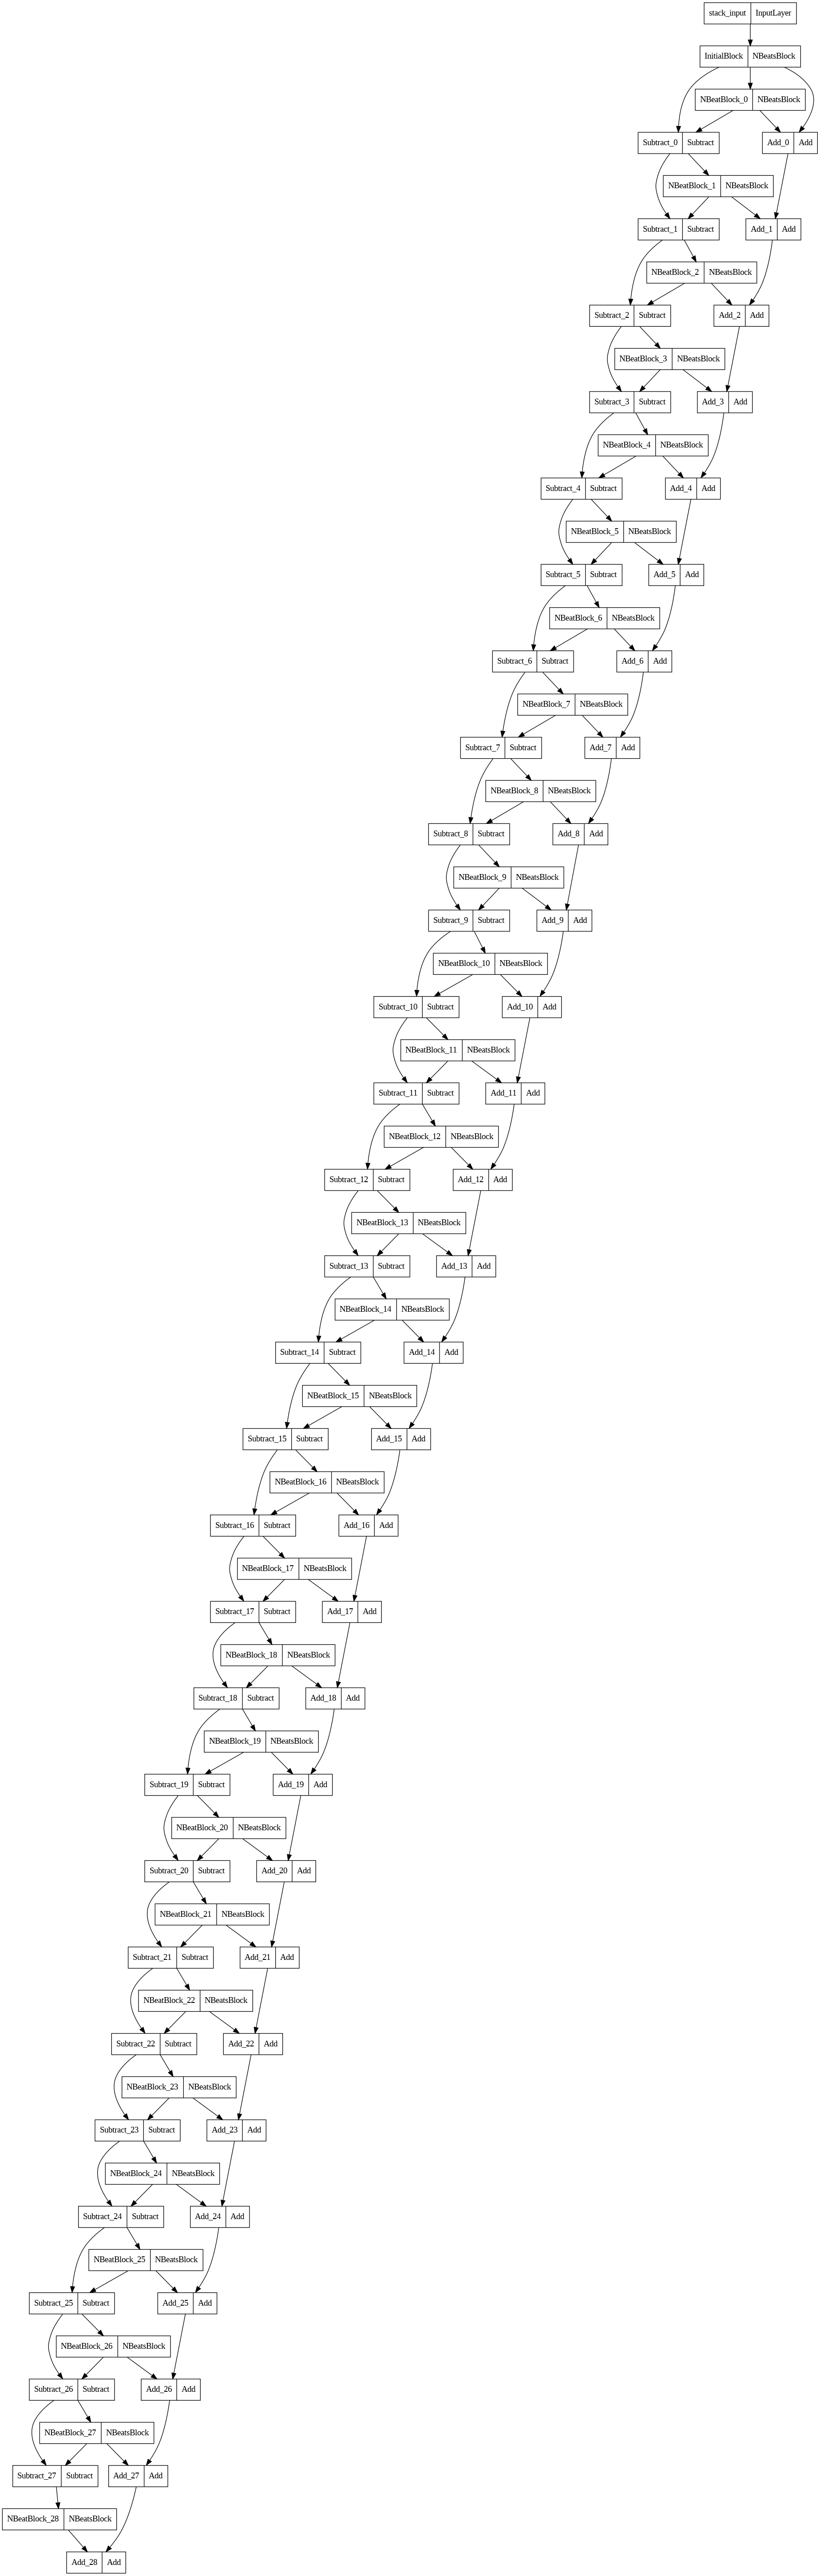

In [131]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8 : Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect(kalabalıgın bilgeligi).

It combines many different models to predict a common goal.

In [132]:
HORIZON , WINDOW_SIZE

(1, 7)

## Constructing and fitting and ensemble of models (using different loss functions)

Ensemble yaparken farklı modellere bakarken aynı zamanda bütün modellerin weightsleri de farklı farklı başlıyor en başta. Bu yüzden bu bize çok büyük bir avantaj sağlıyor.

In [133]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, # It means how many different models that we are going to train.
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
       # Initialize dense layers with normal distribution for estimating prediction intervals later on. ("he_normal" is for normal distribution) (Kernel initialization aslında ilk başta weightslerimizi random geliyor o random gelen weightsleri neye göre ayarlıcaz onu belirliyor.)
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [134]:
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(
    num_iter = 5 ,
    num_epochs = 1000
)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 508: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 608: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 134: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 260: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 360: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 456: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 556: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 217: ReduceLROnPlateau reduci

In [135]:
len(ensemble_models)

15

In [136]:
# Create a function which uses  a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models , data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [137]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(
    ensemble_models = ensemble_models ,
    data = test_dataset
)
ensemble_preds

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 38ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8756.844,  8779.846,  9107.305, ..., 50289.117, 48297.63 ,
        45854.24 ],
       [ 8763.326,  8729.611,  9068.431, ..., 50359.535, 48487.547,
        45628.066],
       [ 8771.841,  8772.66 ,  9050.96 , ..., 50125.547, 48308.812,
        45733.453],
       ...,
       [ 8772.931,  8793.243,  9078.992, ..., 49832.684, 48970.445,
        46415.83 ],
       [ 8705.516,  8734.155,  9043.208, ..., 49869.133, 48158.5  ,
        45831.746],
       [ 8758.727,  8784.277,  9042.905, ..., 49739.227, 47906.64 ,
        45891.445]], dtype=float32)>

In [140]:
ensemble_mean = tf.reduce_mean(ensemble_preds , axis = 0)
ensemble_mean[ : 10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8767.377, 8765.77 , 9053.033, 8713.842, 8734.737, 8703.635,
       8640.424, 8479.472, 8430.363, 8510.667], dtype=float32)>

In [141]:
ensemble_median = np.median(ensemble_preds , axis = 0)
ensemble_median[ : 10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8767.377, 8765.77 , 9053.033, 8713.842, 8734.737, 8703.635,
       8640.424, 8479.472, 8430.363, 8510.667], dtype=float32)>

In [143]:
# Evaluate ensemble model predictions with ensemble_mean
ensemble_results = evaluate_preds(
    y_true = y_test ,
    y_pred = ensemble_mean
)
ensemble_results

{'mae': 568.8023,
 'mse': 1138878.6,
 'rmse': 1067.1825,
 'mape': 2.5835497,
 'mase': 0.9992281}

In [144]:
# Evaluate ensemble model predictions with ensemble_median
ensemble_results = evaluate_preds(
    y_true = y_test ,
    y_pred = ensemble_median
)
ensemble_results

{'mae': 567.8787,
 'mse': 1135219.9,
 'rmse': 1065.4669,
 'mape': 2.5881326,
 'mase': 0.9976056}

Our ensemble preds come out in multiple dimensions but to combine into point predictions we can leverage the mean of all of the predictions or the median

### Plotting the prediction intervals (uncertainty estimates) of our ensemble.

So far , we have been making point predictions with our models.

e.g. horizon = 1 , our model predicts tomorrow's price of bitcoin will be 50,000 usd.

Wouldnt it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 usd on the dot , how about 48,000 to 52,000 usd?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initiliazed models ( we got this thanks to our ensemble model)
2. Measure the standart deviation of the predictions.
3. Multiply the standart deviation by 1.96 ( assuming the distribution is Gaussian/Normal , 95% of observations fall within 1.96 standart deviations of the mean)( We used in our model kernel_initiliazer = he_normal and with respect to this parameter , we distributed with normal distribution.)
4. To get the prediction interval upper and lower bounds , add and subtract the value obtained in step 3 , to the mean/median of the predictions made in step 1. (https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2F97.5th_percentile_point&psig=AOvVaw1CzMxTzBqvygec_OO1fW-Z&ust=1693922112451000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCNDH4OGNkYEDFQAAAAAdAAAAABAD)

In [146]:
tf.math.reduce_std(ensemble_preds , axis = 0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 34.731194,  36.117   ,  37.423542,  61.984642,  44.84075 ,
        39.581375,  39.77169 ,  43.776962,  29.437752,  27.247189,
        41.990158,  34.335773,  37.108875,  44.05983 ,  34.55893 ,
        60.198902,  38.62135 ,  30.492449,  59.269703,  36.102097,
        40.633644,  50.518044,  42.121323,  47.92655 ,  45.544327,
        28.28615 ,  34.393314,  21.24926 ,  24.328453,  28.749699,
        20.875633,  22.092648,  26.307907,  30.182333,  26.627508,
        24.715097,  26.124771,  21.251095,  30.22935 ,  23.755894,
        40.270752,  60.003002,  63.74806 ,  60.74929 ,  46.463867,
        42.815628,  17.625261,  20.796036,  20.893303,  17.528067,
        18.502125,  20.079668,  22.679737,  18.74028 ,  22.347912,
        31.722185,  28.021887,  33.28849 ,  39.60814 ,  40.45295 ,
        27.14857 ,  31.14499 ,  32.39703 ,  33.622665,  39.355465,
        30.881687,  30.095509,  50.940334,  41.22252 ,  47.836754,
        32.093

Normal distributiona sahip datalarda mean direkt normal distribution curve ünün ortası oluyor. Normal distribution da datanın %95 ini coverlamak istiyorsan datanın mean değerine , datandan elde ettiğin standart deviation değerinin 1.96 ile çarpılmış halini ekleyip çıkartman lazım. Sonrasında bu iki değeri birleştirdiğinde datanın %95 ini coverlamış oluyorsun.

In [147]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # Step 1 : get predictions from a number of randomly initialized models.
     # Step 2 : Measure the standart deviations of the predictions.
     std = tf.math.reduce_std(preds , axis = 0)

     # Step 3 : Multiply the standart deviation by 1.96
     interval = 1.96 * std

     # Step 4 : Get the prediction interval upper and lower bounds.
     preds_mean = tf.reduce_mean(preds , axis = 0)
     lower , upper = preds_mean - interval , preds_mean + interval

     return lower , upper




In [148]:
# Get the lower and upper bounds
lower_bound , upper_bound = get_upper_lower(ensemble_preds)
lower_bound , upper_bound

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8699.304 ,  8694.98  ,  8979.683 ,  8592.352 ,  8646.85  ,
         8626.056 ,  8562.472 ,  8393.669 ,  8372.665 ,  8457.263 ,
         8107.6694,  8022.384 ,  7965.706 ,  7533.969 ,  7208.507 ,
         7179.765 ,  6996.143 ,  7151.3354,  6992.7324,  7452.846 ,
         7311.775 ,  7643.8423,  7470.219 ,  7283.0713,  7226.9844,
         7235.988 ,  7137.7656,  7334.2163,  7452.6553,  7476.947 ,
         7500.517 ,  7273.959 ,  7164.647 ,  7111.433 ,  7121.6846,
         7173.234 ,  7014.492 ,  7044.022 ,  6797.618 ,  6525.7075,
         7324.01  ,  7060.393 ,  7040.308 ,  7139.8735,  7155.866 ,
         7114.808 ,  7171.3945,  7155.0283,  7128.5776,  7168.455 ,
         7258.6997,  7340.7905,  7192.236 ,  7117.629 ,  7103.3066,
         6875.8477,  7214.7617,  7264.834 ,  7275.553 ,  7640.887 ,
         8022.221 ,  8073.5723,  7778.5156,  8017.108 ,  8016.6963,
         8100.5967,  8036.8813,  8654.335 ,  8821.215 ,  8669.64  ,

In [150]:
X_test.index[ 500 :  ]

DatetimeIndex(['2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27',
               '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18'],
     

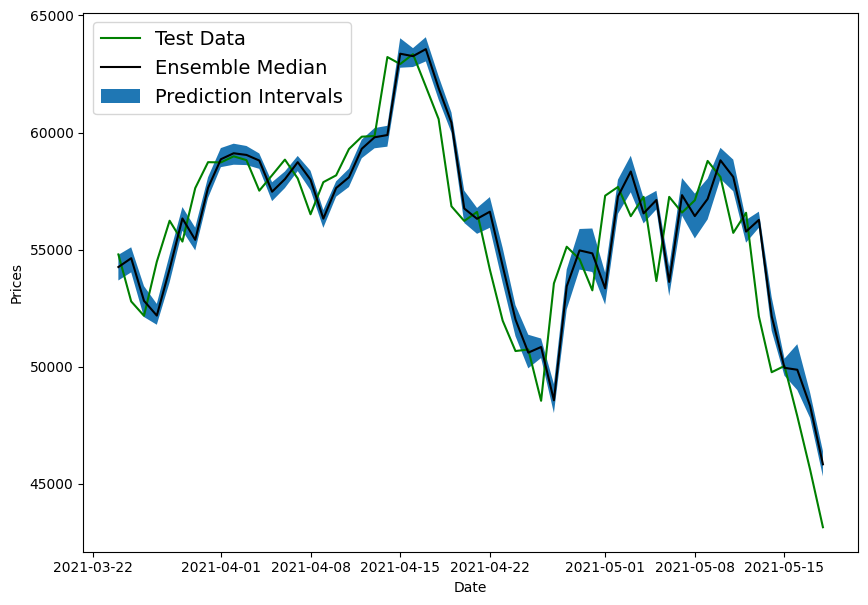

In [156]:
# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize = (10 , 7))
plt.plot( X_test.index[ offset :  ]  , y_test[ offset : ] , "g-" , label = "Test Data")
plt.plot( X_test.index[ offset :  ] , ensemble_median[ offset : ] , "k-" , label = "Ensemble Median" )
plt.xlabel("Date")
plt.ylabel("Prices")
plt.fill_between( X_test.index[ offset : ] ,
                 (lower_bound)[ offset : ] ,
                 (upper_bound)[ offset : ] , label = "Prediction Intervals"
                  )  # For plotting upper and lower bounds
plt.legend(loc = "upper left" , fontsize = 14);


So far all of our predictions have been lagging behind the test data.

As is they are replicating what the naive model does and just predict the previous timestep as the next timestep.

Note : These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside : Two types of uncertainity : (coconut and subway)

Uncertainity estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? ( with perfect data , what is possible for a model to learn?)
2. What doesnt my model know? ( what can a model never predict? Or would it helpful if a model could tell you that when it is making a prediction, it doesnt actually know if it is right or not?) ( Food vision projemizde bir köpek fotoğrafı predict etmeye calıstıgımızda modelimizin bize ben daha önce böyle bir image train etmedim ve sonucu bilmiyorum demesi.)

There are two major types of uncertainity in machine learning you should know about:
* Aleatoric uncertainity - This type of uncertainity cant be reduced and it is often referred as data uncertainity or subway uncertainity.
* Epistemic uncertainity - This type of uncertainity can be reduced , it is also referred as "model" or "coconut" uncertainity.

# Model 9 : Train a model on the full historical data to make predictions into the future.

So far all of our models have predicted on the test dataset , however, this is only a pseudofuture.

Lets now build a model which is capable of predicting into the future.

In [157]:
bitcoin_prices_windowed.tail()  # Bütün datamızı train dataset olarak kullanacağız çünkü artık gerçekten future predict yapacağız.

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [161]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price" , "block_reward"] , axis = 1 ).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(X_all) , len(y_all)

(2780, 2780)

In [167]:
# Prefetching for faster fitting
dataset_all = tf.data.Dataset.from_tensor_slices((X_all , y_all))
dataset_all = dataset_all.batch(1024).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [168]:
HORIZON = 1
WINDOW_SIZE = 7

In [172]:
from keras.backend import configure_and_create_distributed_session
# Create our model for predicting future
tf.random.set_seed(42)
model_9 = tf.keras.Sequential(
    [
        layers.Dense(128 , activation = "relu" ) ,
        layers.Dense(128 , activation = "relu" ) ,
        layers.Dense(HORIZON )

    ] , name = "model_9_all"
)
# Compile a model
model_9.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                )

# Fit the model
model_9.fit(
    dataset_all ,
    epochs = 100

)

Epoch 1/100
3/3 [==============================] - 2s 8ms/step - loss: 4445.1143
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 2517.1196
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 664.8619
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1265.9741
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1533.9301
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 923.6577
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 421.2530
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 704.1992
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 616.2292
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 365.8928
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 500.3143
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 451.5980
Epoch 13/100
3/3 [==============

Biz her yeni predict yapacağımız zaman modelimizi retrain etmemiz gerekiyor. Çünkü her bir future predictimizde datamıza yeni bir datapoint ekleniyor bu da bizim predict ettigimiz deger oluyor. Yaptıgımız her predictionu previous inputumuza append edicez. Sonrasında append edilmiş inputu train edip yeni predictionlarımızı yapıcaz.

## Make predictions into future

In [176]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:
1. Takes as input:
  * A list of values (bitcoin historical data)
  * A trained model ( such as model_9)
  * A window into the future to predict (our INTO_FUTURE variable)
  * The window size a model was trained on (WINDOW_SIZE). The model can only predict on the same kind of data it was trained on (should be in the same shape).
2. Creates an empty list for future forecasts (this will be returned at the end of the list , when it is full of predictions.) and extracts the last WINDOW_SIZE values from the input values.
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE sequences which update to remove the first value and append the latest prediction. ( Prediction yaptıktan sonra yukarda bahsettigimiz inputumuzu update etme kısmı burası. Son prediction ımız bizim bir sonraki step için windowumuzun içine girecek ve bütün windowlar aynı size da olması gerek. Bu yüzden bizim prediction ımız windowun içine girdiğinde bir önceki windowun ilk elementini silmemiz gerekiyor aynı size ı elde etmek için.)  

In [173]:
y_all[ - WINDOW_SIZE : ]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [180]:
# Create a function to make predictions into the future
def make_future_forecasts(values , model , into_future , window_size = WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # Create an empty list for future forecast/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE : ]

  # Make into_future number of predictions , altering the data which gets predicted on each time.
  for _ in range(into_future):
    # Predict on the last window then append it again again and again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window , axis = 0))
    print(f"Predicted on : \n {last_window} -> Prediction : {tf.squeeze(future_pred).numpy()} \n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE window)
    last_window = np.append(last_window , future_pred)[-WINDOW_SIZE : ]
  return future_forecast

In [181]:
# Make forecasts into the future
future_forecast = make_future_forecasts(
    values = y_all ,
    model = model_9 ,
    into_future = INTO_FUTURE ,

)

1/1 [==============================] - 0s 21ms/step
Predicted on : 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction : 55949.90234375 

1/1 [==============================] - 0s 19ms/step
Predicted on : 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55949.90234375] -> Prediction : 51075.79296875 

1/1 [==============================] - 0s 18ms/step
Predicted on : 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55949.90234375 51075.79296875] -> Prediction : 49095.62109375 

1/1 [==============================] - 0s 20ms/step
Predicted on : 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55949.90234375 51075.79296875 49095.62109375] -> Prediction : 49226.36328125 

1/1 [==============================] - 0s 19ms/step
Predicted on : 
 [47885.62525472 45604.61575361 43144.47129086 55949.90234375
 51075.79296875 49095.62109375

In [185]:
def get_future_dates(start_date , into_future , offset = 1):  # offset değeri, başlangıç tarihine eklenir. Bu, başlangıç tarihini kaydırmanıza olanak tanır. Örneğin, varsayılan offset değeri 1 ise ve başlangıç tarihi 2023-09-04 ise, başlangıç tarihi 2023-09-05 olur.
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset , "D")  # D refers to day format
  end_date = start_date + np.timedelta64(into_future , "D")
  return np.arange(start_date , end_date , dtype = "datetime64[D]")

In [186]:
# Last timestep of timesteps
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [187]:
# Offset burda işe yarıyor. Bizim günlerimiz last_timestepten sonraki günden itibaren başlayacak offset sayesinde.
# Get next two weeks time steps
next_time_steps = get_future_dates(start_date = last_timestep , into_future = INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [189]:
# Insert last timestep/final price into next timesteps and future forecasts so the plot doesnt look janky
next_time_steps = np.insert( next_time_steps , 0 , last_timestep )
future_forecast = np.insert( future_forecast , 0 , btc_price[-1] )


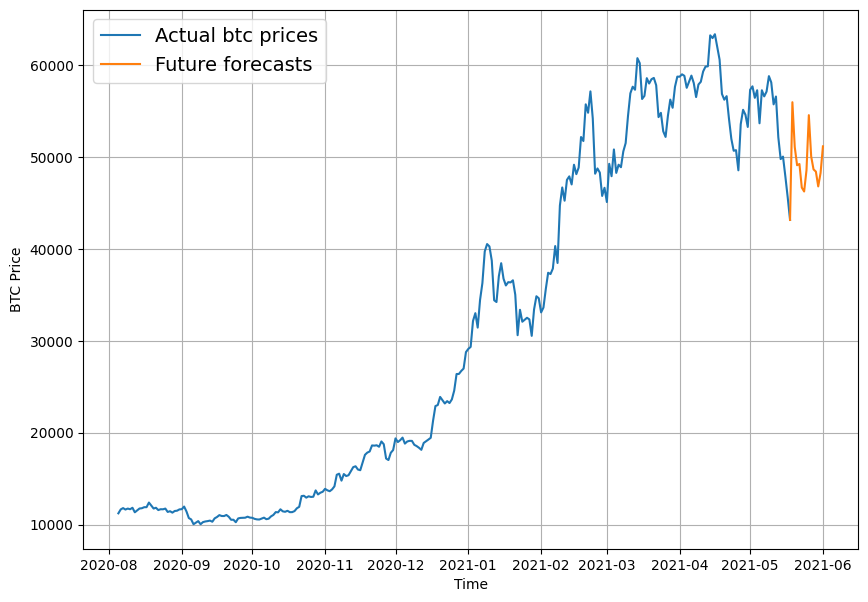

In [190]:
# Plot future prices of bitcoins
plt.figure(figsize = ( 10 , 7 ))
plot_time_series( bitcoin_prices.index , btc_price , start = 2500 , format = "-" , label = "Actual btc prices"  )
plot_time_series(next_time_steps ,future_forecast , format = "-"  , label = "Future forecasts" )

# Model_10 : Why forecasting is BS? (the turkey problem)(bir inek 1000 gününü çok iyi geçirebilir fakat 1001. gün kendini bizim soframızda bulabilir. Yani sadece 1 datapoint bütün datamızı değiştirebilir. Turkey problem bunu anlatıyor.)

In [193]:
# Lets introduce a turkey problem to out btc data ( price of btc falls 100x in one day )
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [194]:
# Manufacture an extra price on the end (to showcase of turkey problem)
btc_price_turkey[-10 : ]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [195]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

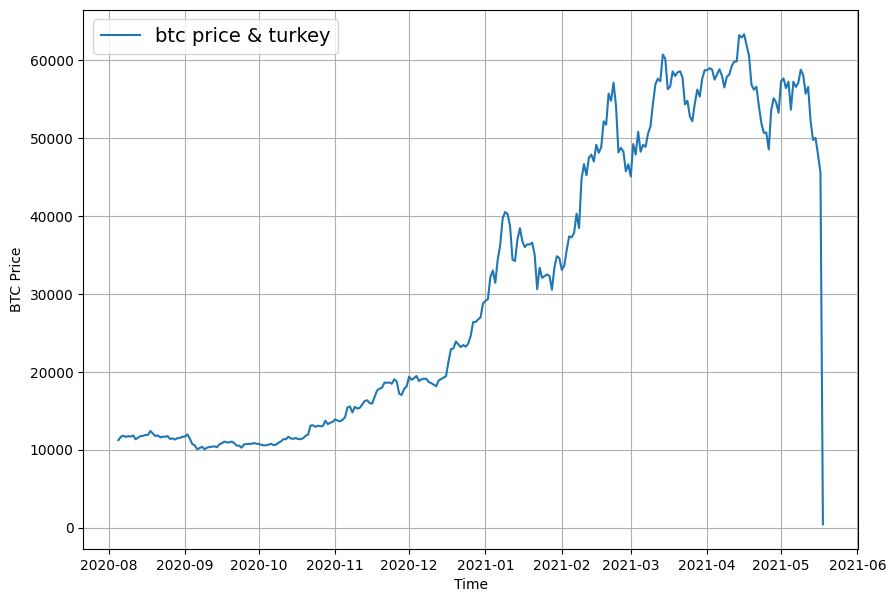

In [196]:
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = btc_timesteps_turkey , values = btc_price_turkey , start = 2500 , format = "-" , label = "btc price & turkey" )

Sadece son datapointi değiştirdik.

In [197]:
# Create train and test set for turkey problem data
full_windows , full_labels = make_windows( np.array(btc_price_turkey)  , window_size = WINDOW_SIZE , horizon = HORIZON)
X_train , X_test , y_train , y_test = make_train_test_splits(full_windows , full_labels)

In [ ]:
;